# Data Exploration

In [18]:
%load_ext autoreload
%autoreload 2

from assaiku.data import DataConfig, DataPipe
from assaiku.data.validation import load_and_validate
from assaiku.data.exploration import (
    visualize_categorical_dist, 
    visualize_continuous_dist, 
    visualize_correlation,
    analyze_nans, 
    analyze_label_dist,
    visualize_distance
)
from assaiku.data.processing import remove_group_duplicates
import pandas as pd
# import logging

# logging.basicConfig(format='%(asctime)s:%(levelname)-8s:%(name)s:%(message)s', 
#                     level=logging.INFO,
#                     )

pd.set_option('display.max_columns', 50)

data_config = DataConfig(perform_exploration=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading and validating data

In [2]:
train_df, test_df = load_and_validate(data_config=data_config)

## Start of the analysis

### Duplicates and NaN

In [4]:
analyze_nans(train_df)

Number of nans in the data: 0


In [ ]:
clean_train_df = remove_group_duplicates(train_df,weight_col=data_config.weight_col, remove_age=True)
clean_test_df = remove_group_duplicates(test_df,weight_col=data_config.weight_col, remove_age=True)

Number of duplicates including instances_weights: 3229
Number of duplicates excluding instances_weights: 46627
Dropping duplicates including the instances_weight (systematic error)
Gropuping same instances and their weight instances
Number of samples after cleaning: 152896
Number of duplicates including instances_weights: 883
Number of duplicates excluding instances_weights: 20898
Dropping duplicates including the instances_weight (systematic error)
Gropuping same instances and their weight instances
Number of samples after cleaning: 78864


In [17]:
# Let's look at the distribution of labels
print("Train")
analyze_label_dist(data=clean_train_df, data_config=data_config)
print("Test")
analyze_label_dist(data=clean_test_df, data_config=data_config)

Train
Distribution of labels
|    | income   |   proportion |
|---:|:---------|-------------:|
|  0 | - 50000. |    0.935004  |
|  1 | 50000+.  |    0.0649962 |
Test
Distribution of labels
|    | income   |   proportion |
|---:|:---------|-------------:|
|  0 | - 50000. |    0.936101  |
|  1 | 50000+.  |    0.0638992 |


## Distribution depending on income

### Numerical values

We will analyze how the distribution is different for the two groups of income (namely -50000 and +5000). For this we will first visualize the distributions for each continuous feature for the two groups of income to get a qualitative feeling about which parameter may have an impact on the income. Then we will run a more quantitative study where we will compute the correlation coefficient between the continuous variable and the income value binarized to 0 and 1.

In [ ]:
visualize_correlation(data=clean_train_df,
                      data_config=data_config,)

In [ ]:
visualize_continuous_dist(data=clean_train_df,
                          data_config=data_config,
                          folder_path="results/exploration/continuous",
                          filter_cols=None,
                          # filter_cols=["age","wage_per_hour"],
                          )

### Categorical Values

In [ ]:
visualize_distance(data=clean_train_df, data_config=data_config)

In [ ]:
visualize_categorical_dist(data=clean_train_df, 
                           data_config=data_config, 
                           folder_path="results/exploration/categorical",
                           filter_cols=["detailed_industry_recode",
                           "family_members_under_18","sex","veterans_benefits", "reason_for_unemployment"])

Removing duplicates train set
Number of duplicates including instances_weights: 3229
Number of duplicates excluding instances_weights: 46627
Dropping duplicates including the instances_weight (systematic error)
Gropuping same instances and their weight instances
Removing age below 16
Number of samples after cleaning: 138669
Removing duplicates test set
Number of duplicates including instances_weights: 883
Number of duplicates excluding instances_weights: 20898
Dropping duplicates including the instances_weight (systematic error)
Gropuping same instances and their weight instances
Removing age below 16
Number of samples after cleaning: 70787
Number of nans in the data: 0
Number of nans in the data: 0
Distribution of labels
|    | income   |   proportion |
|---:|:---------|-------------:|
|  0 | - 50000. |    0.915452  |
|  1 | 50000+.  |    0.0845484 |
Distribution of labels
|    | income   |   proportion |
|---:|:---------|-------------:|
|  0 | - 50000. |    0.916663  |
|  1 | 50000+.

/Users/arnaudguibbert/Documents/Code/dataiku-analysis/assaiku/data/exploration/categorical.py:110: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  dist = compute_dist(


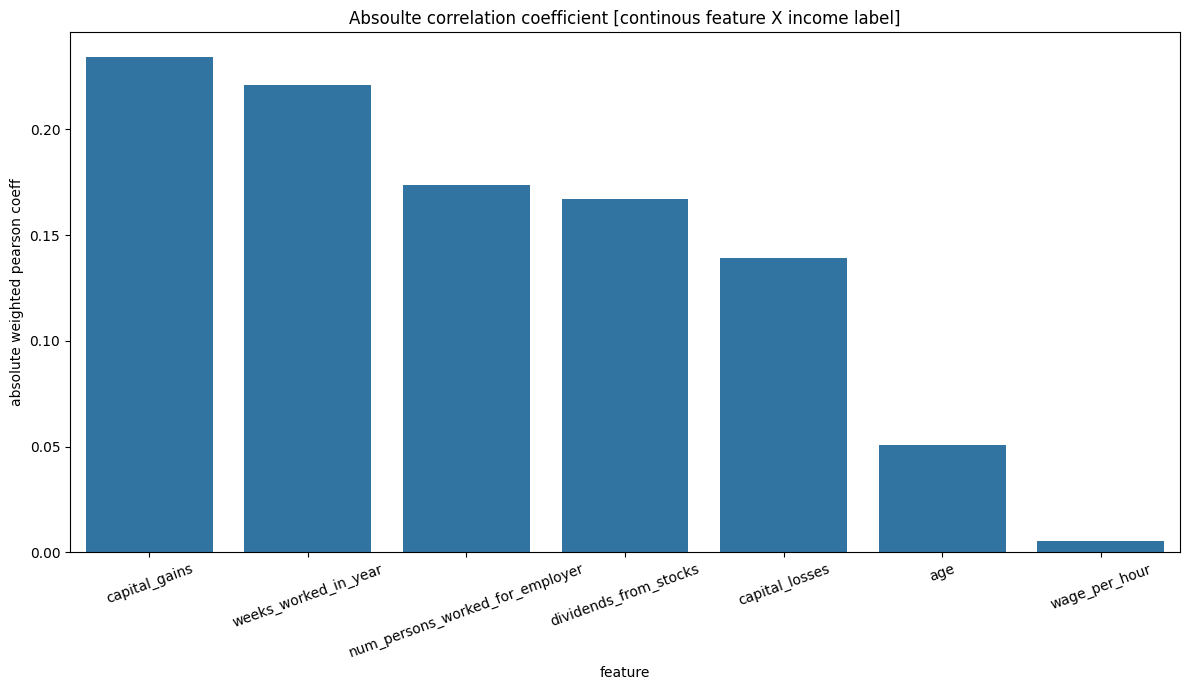

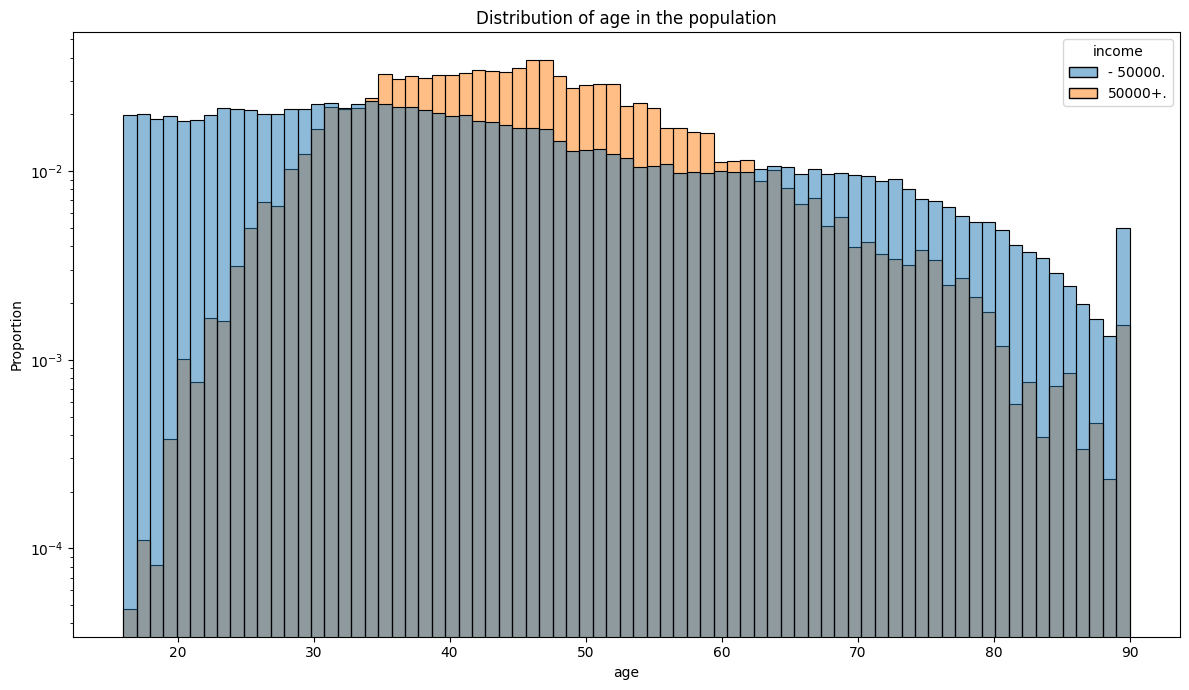

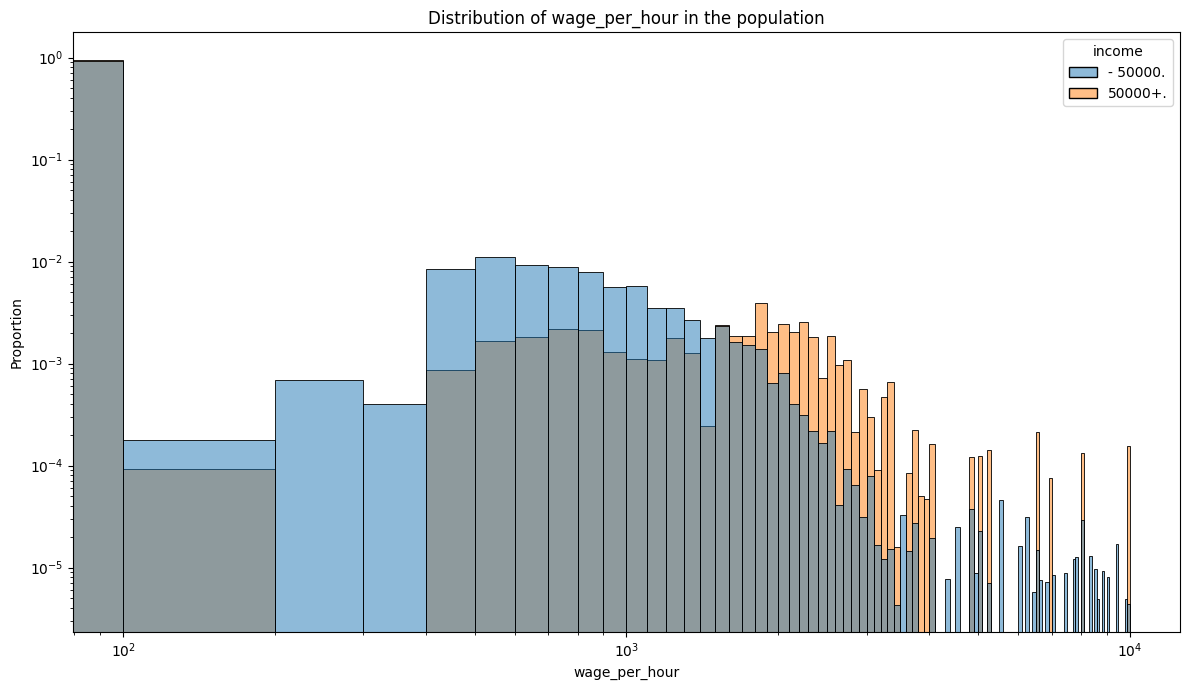

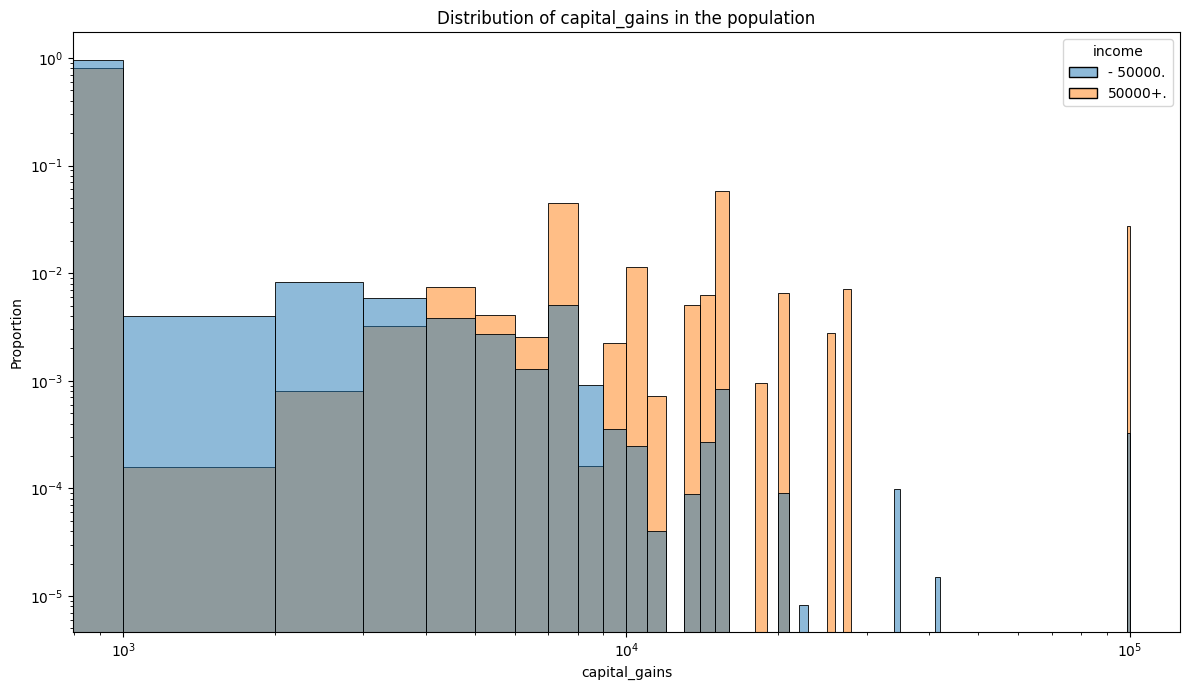

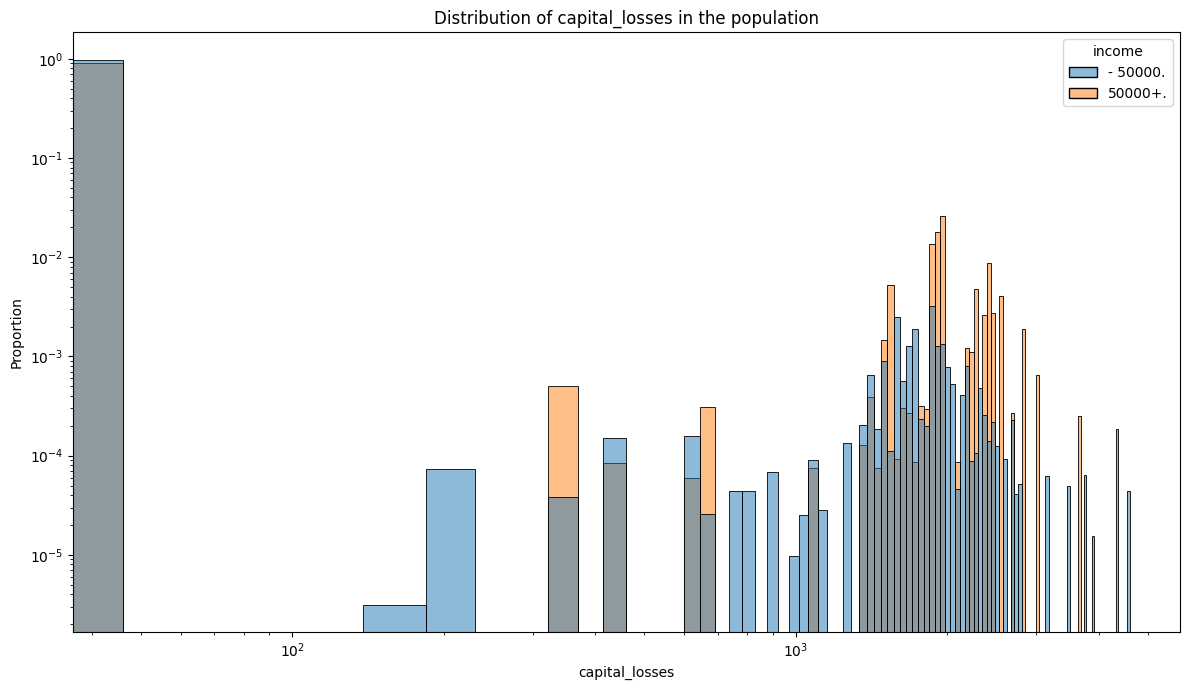

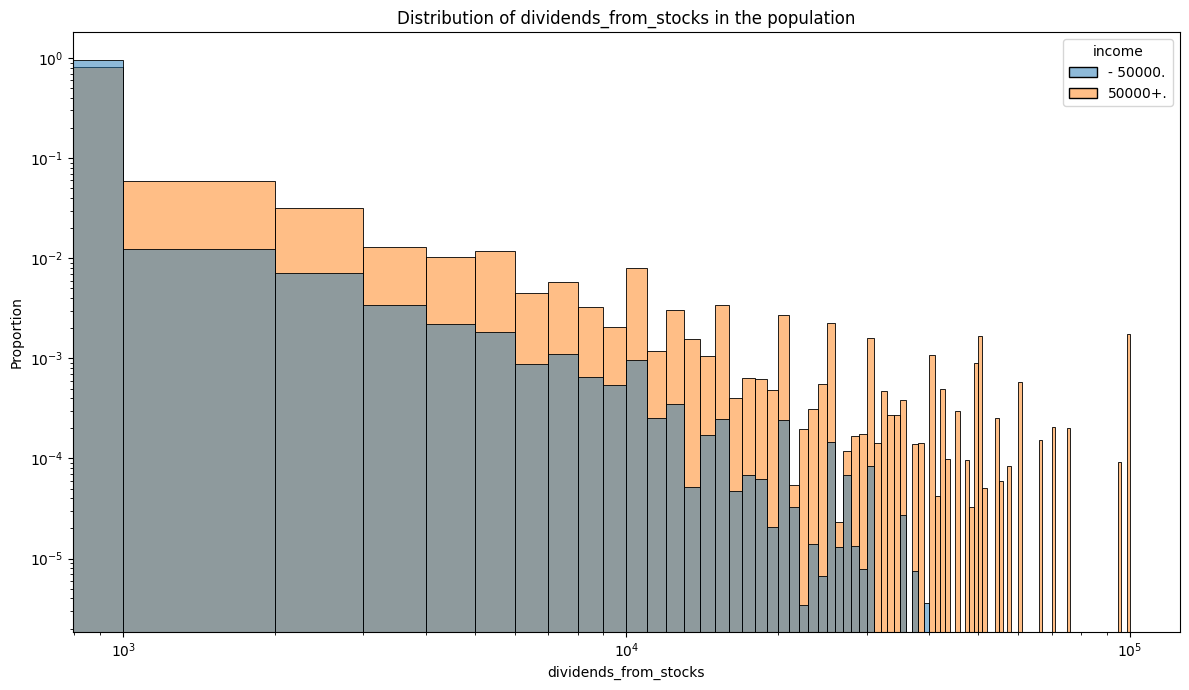

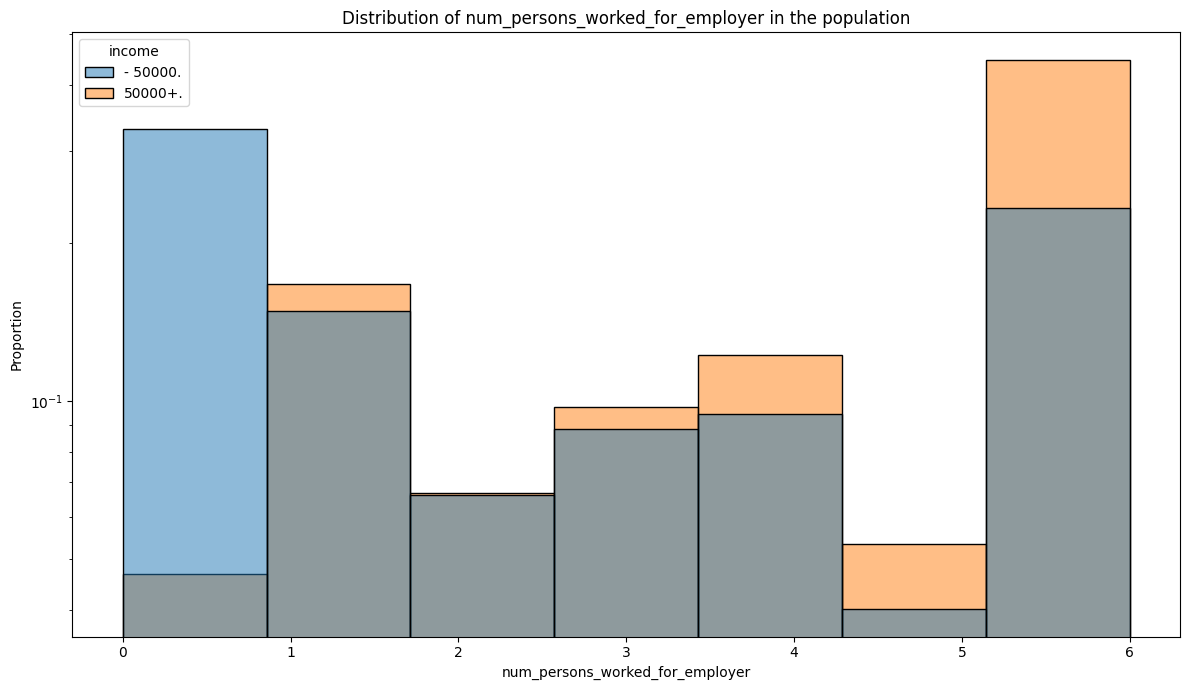

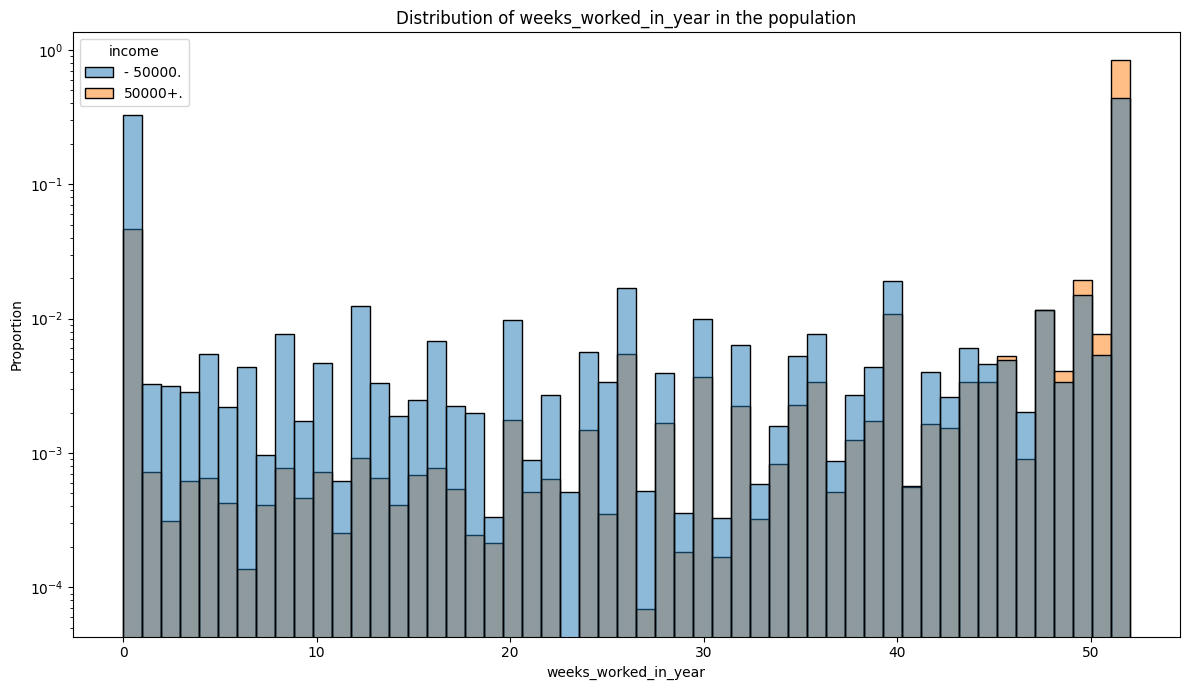

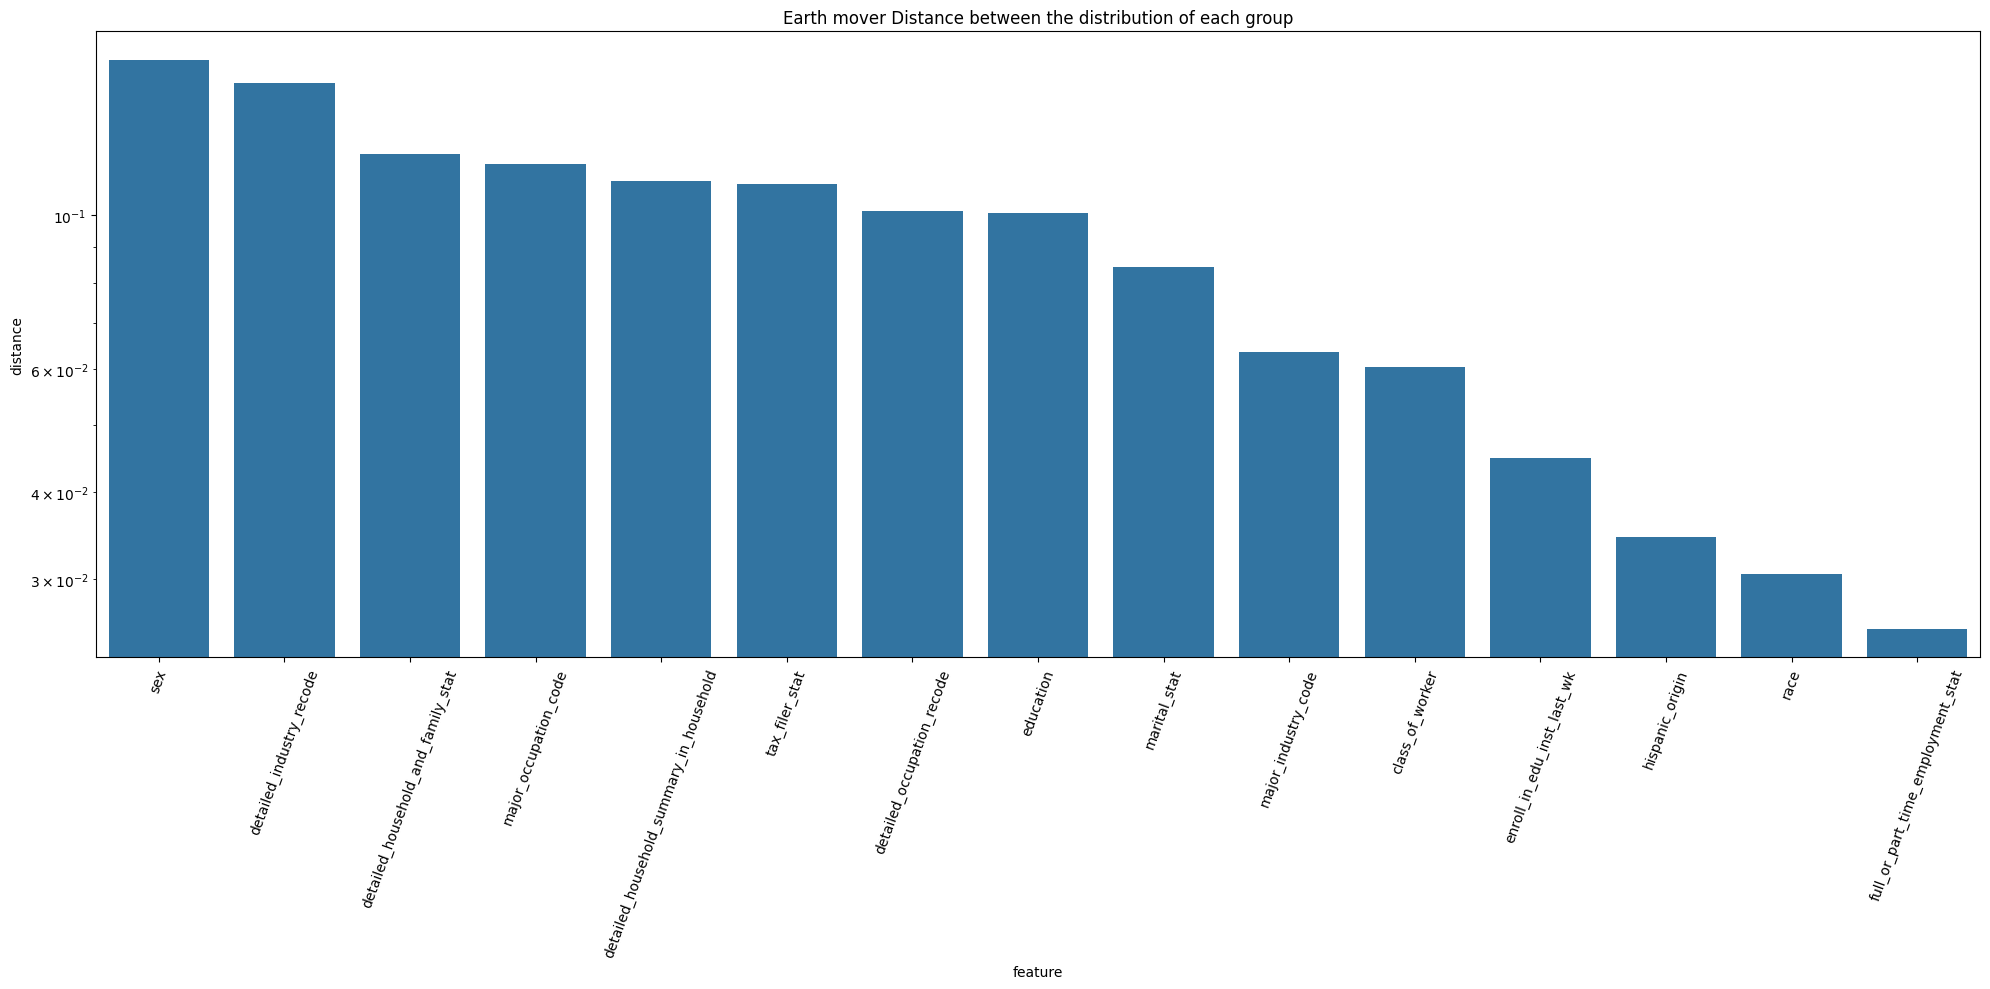

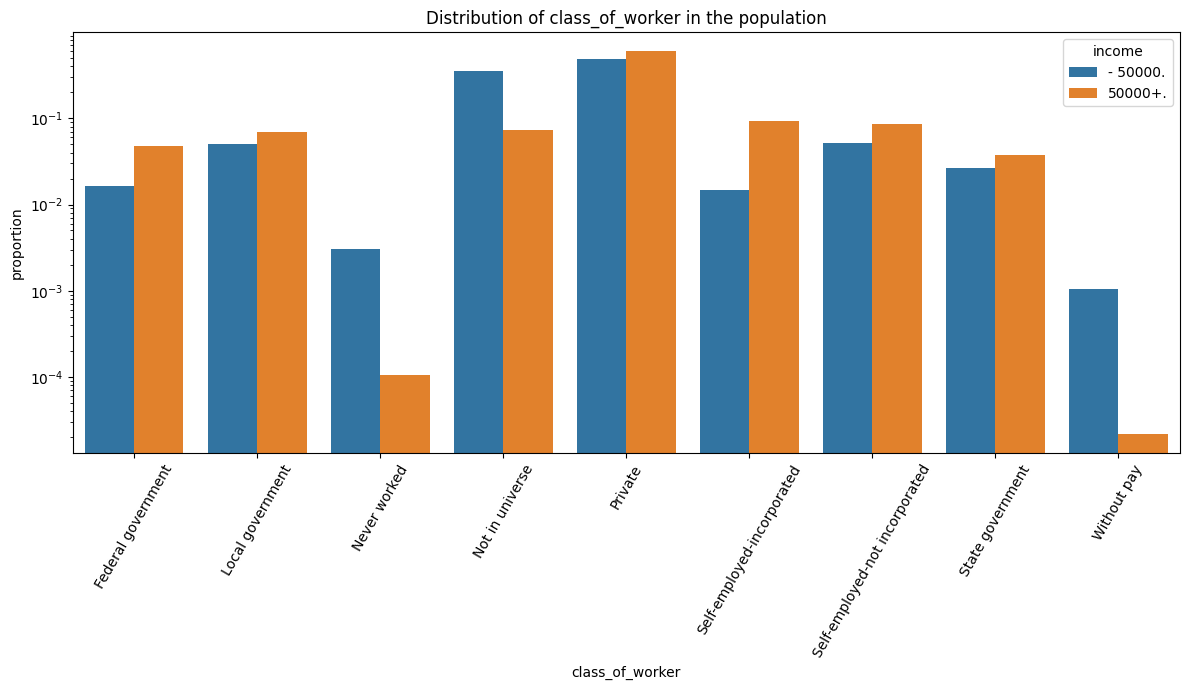

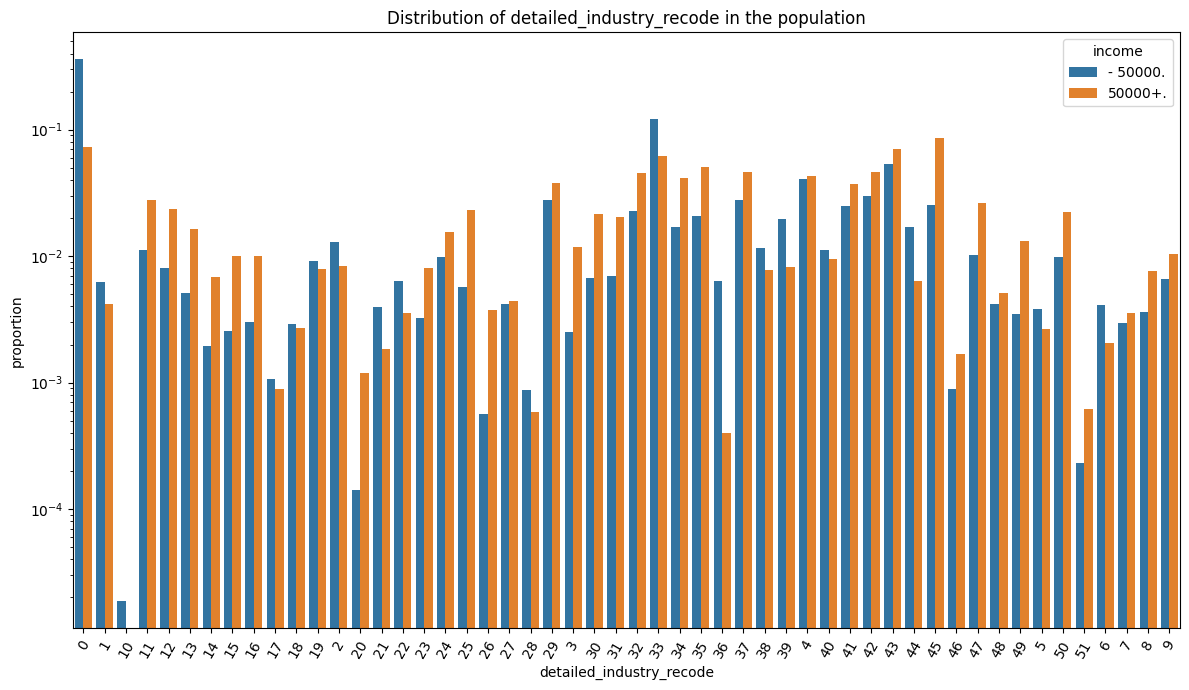

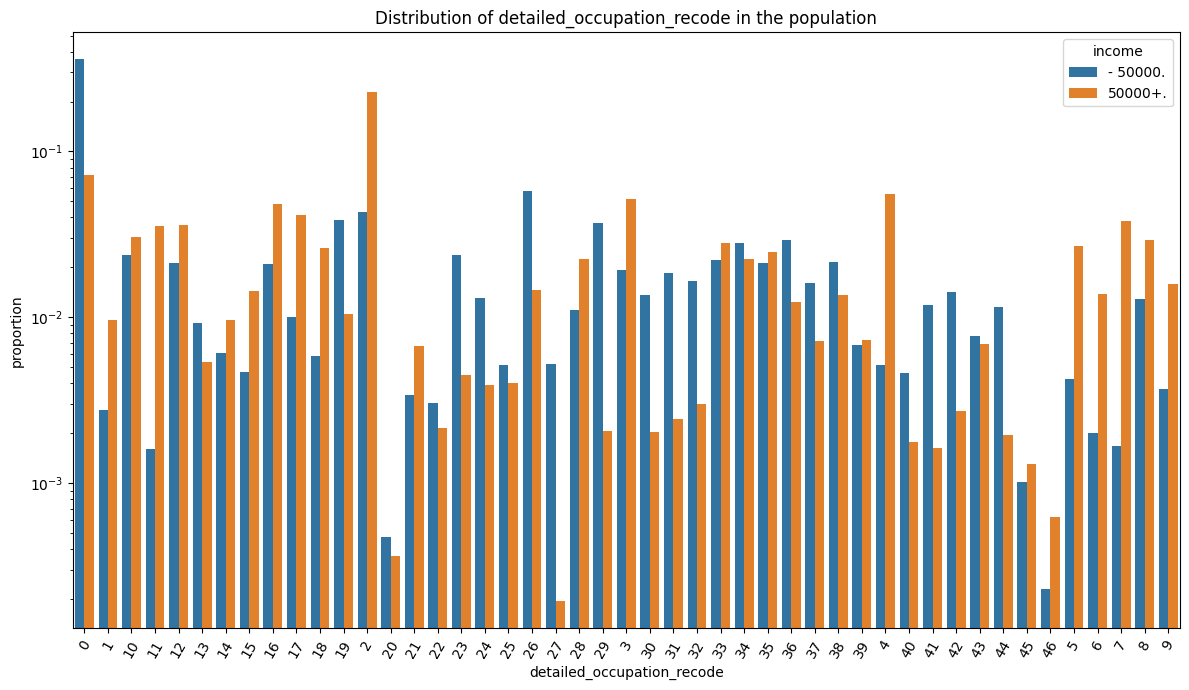

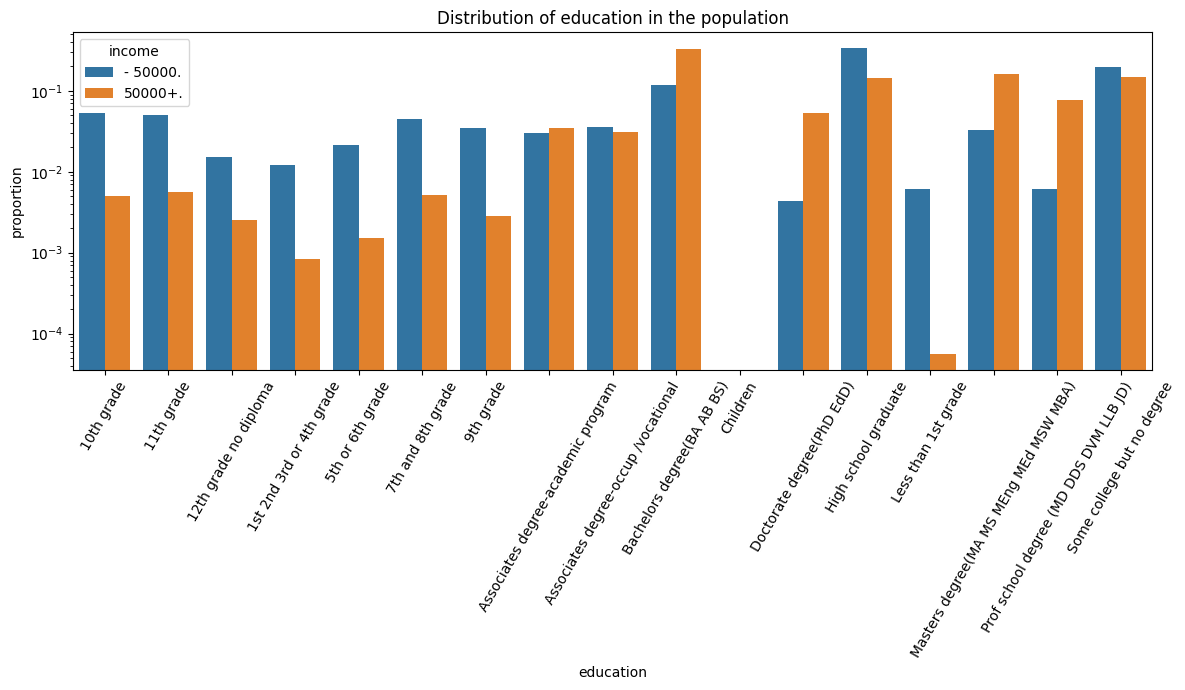

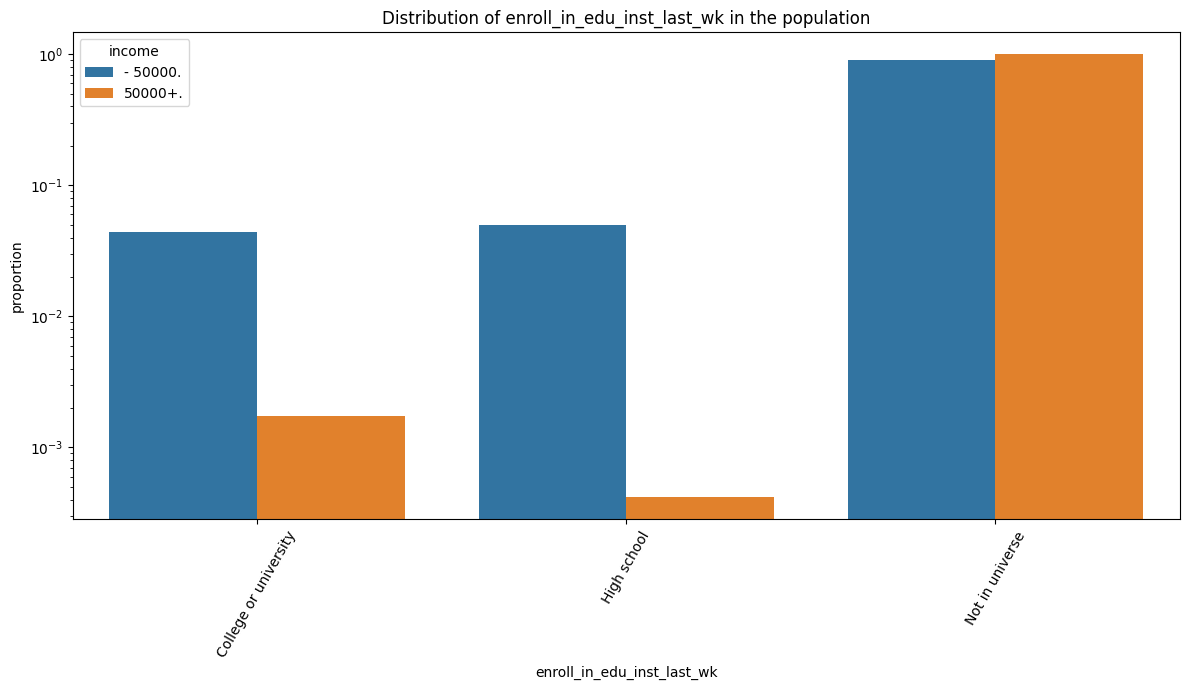

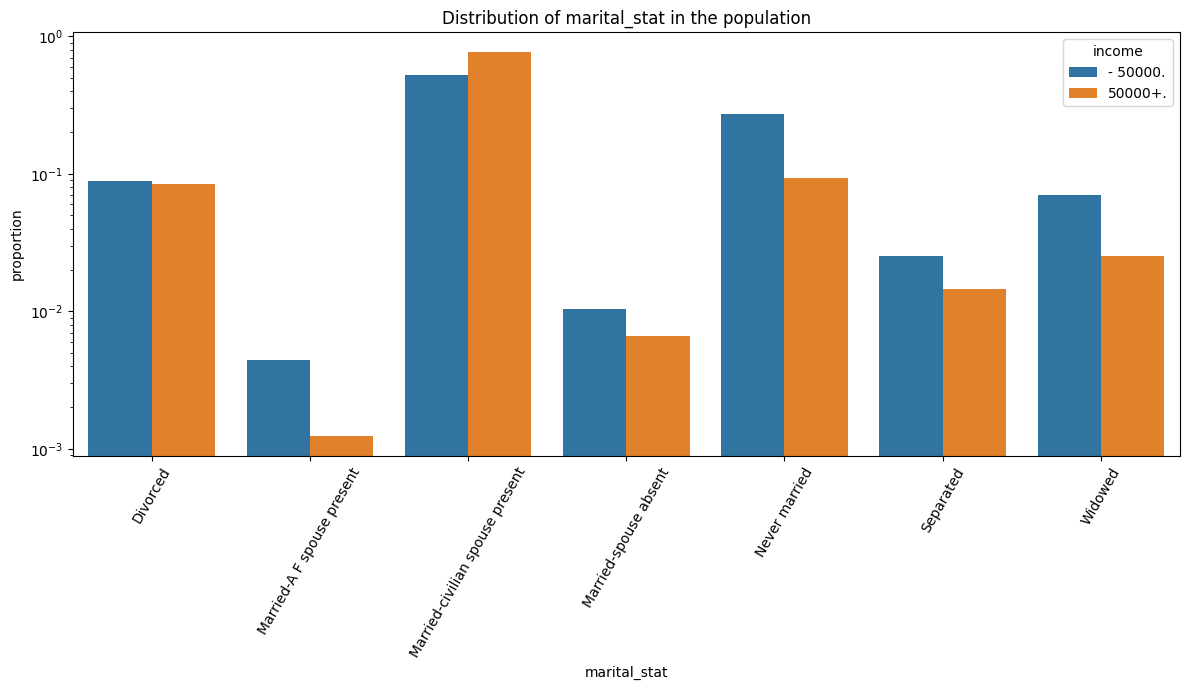

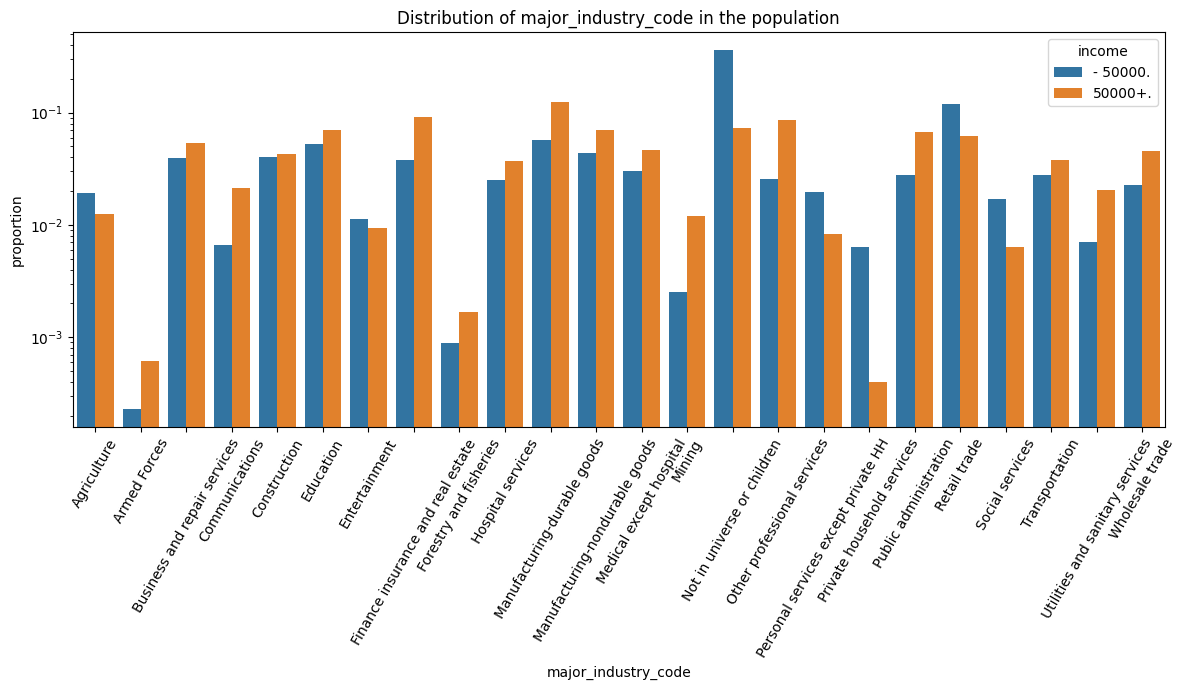

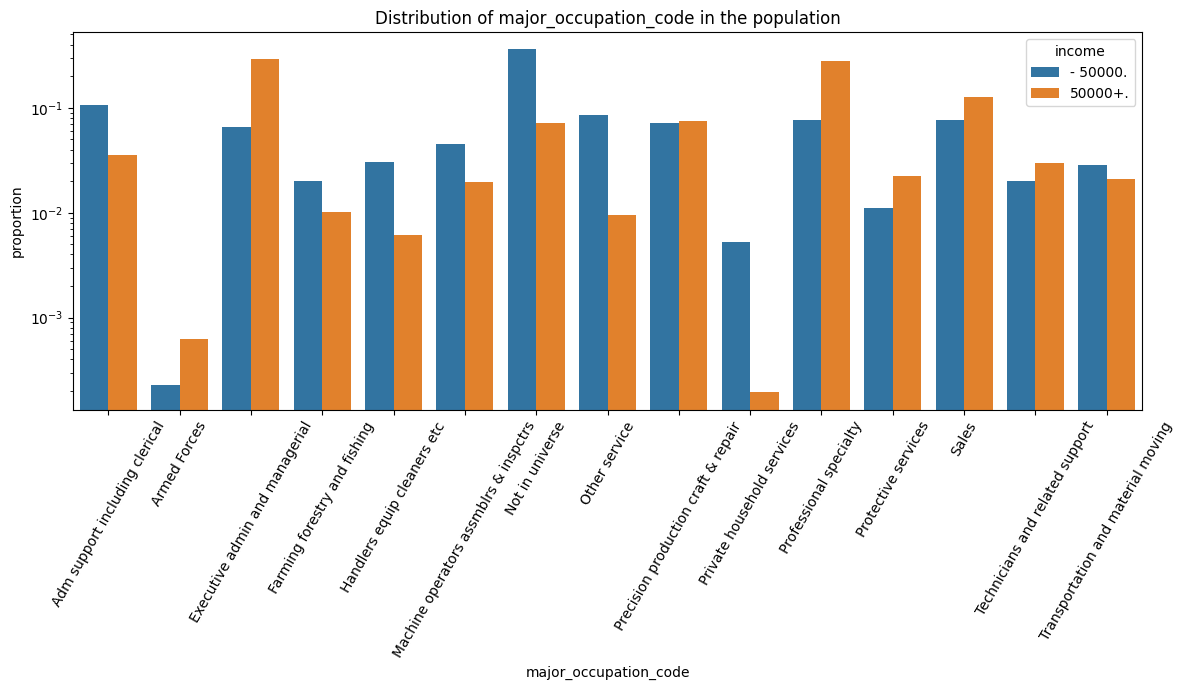

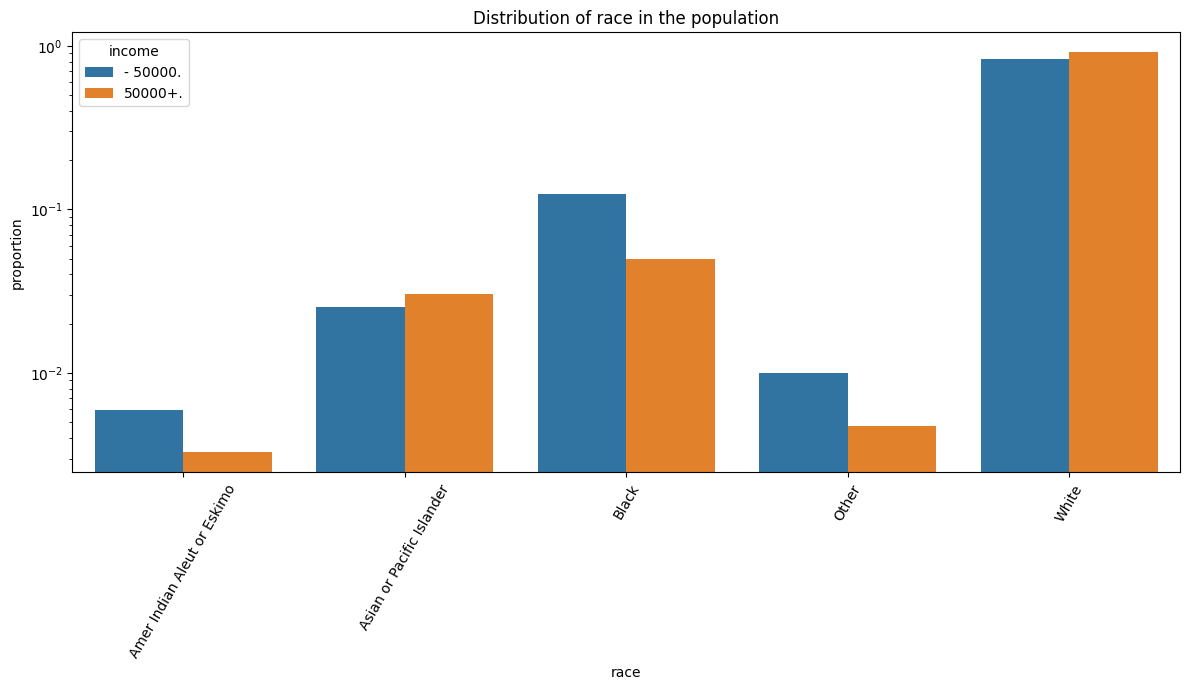

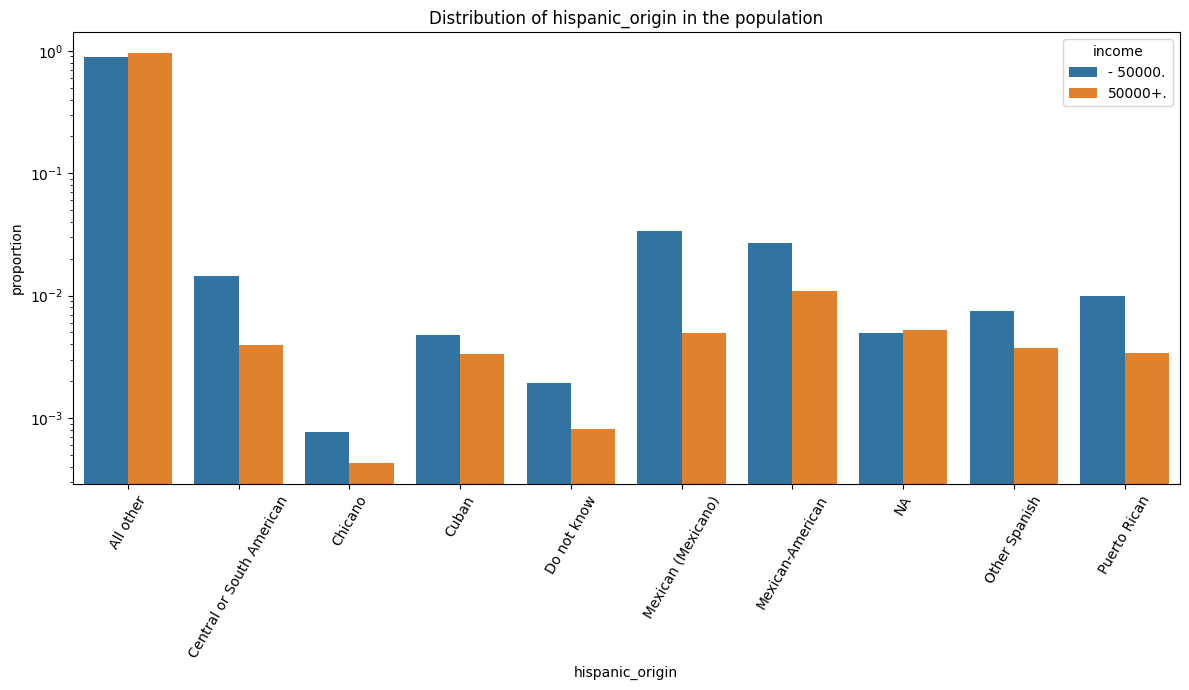

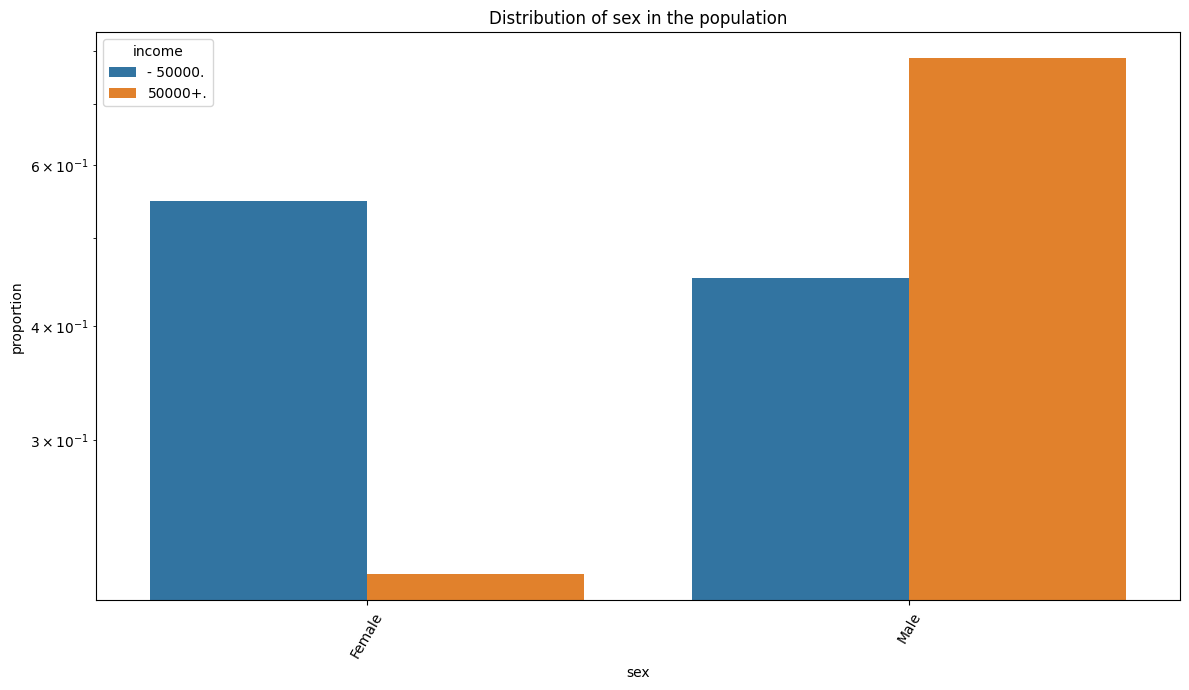

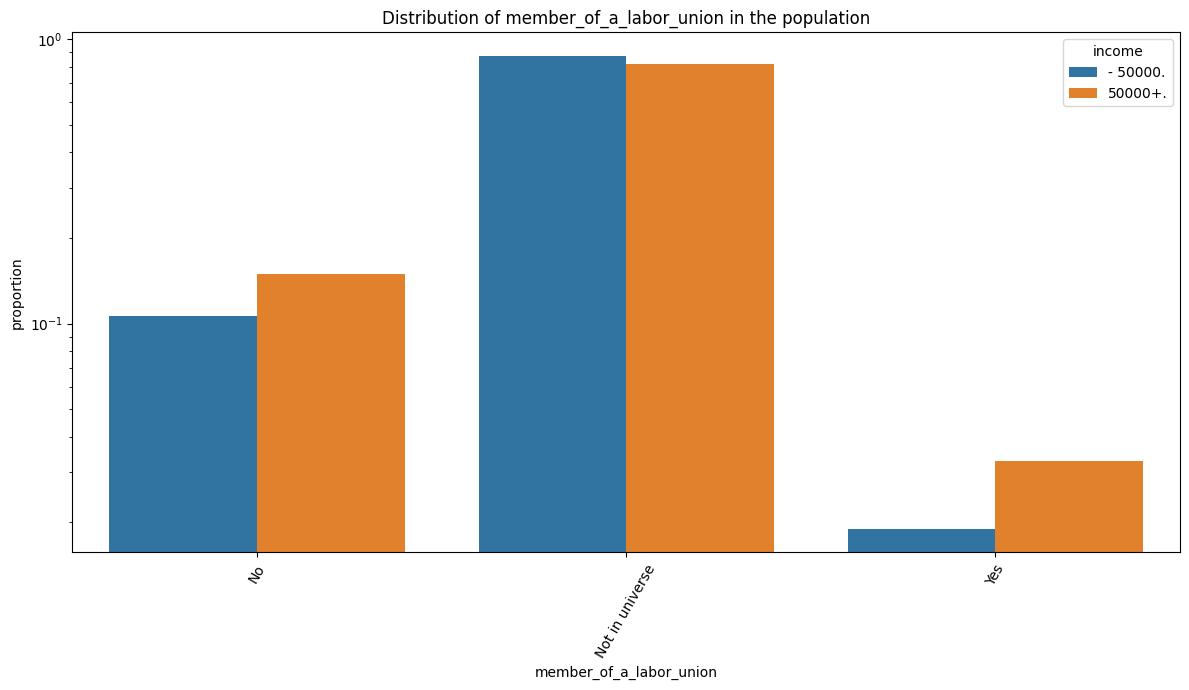

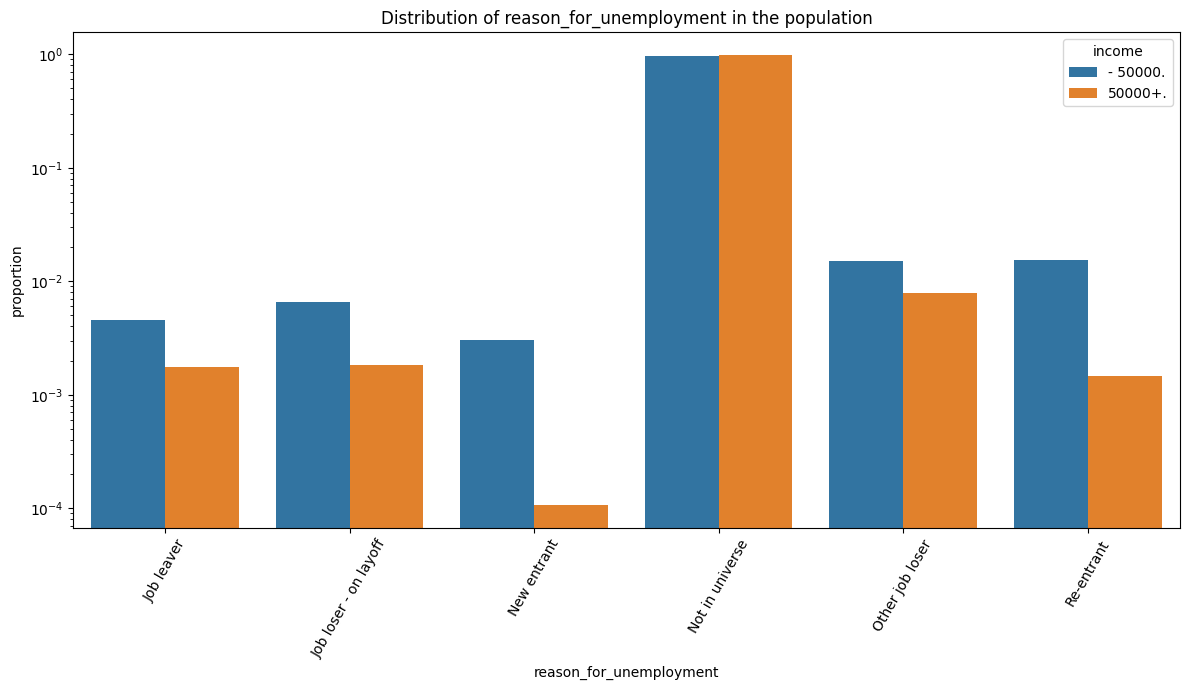

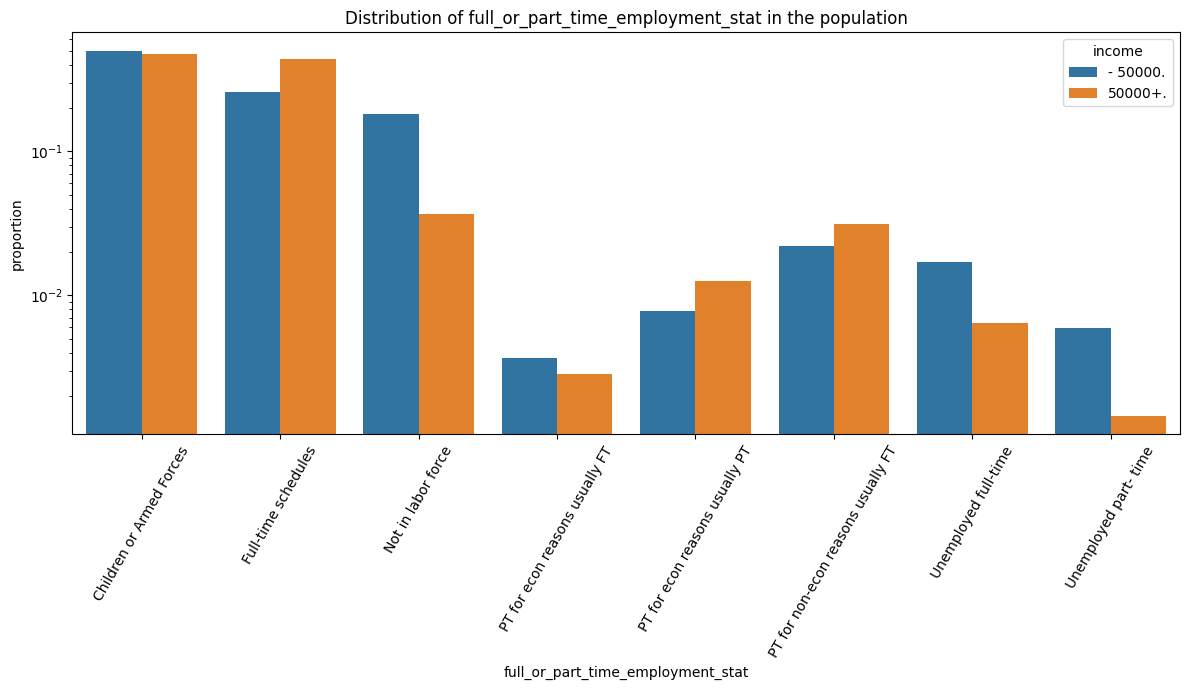

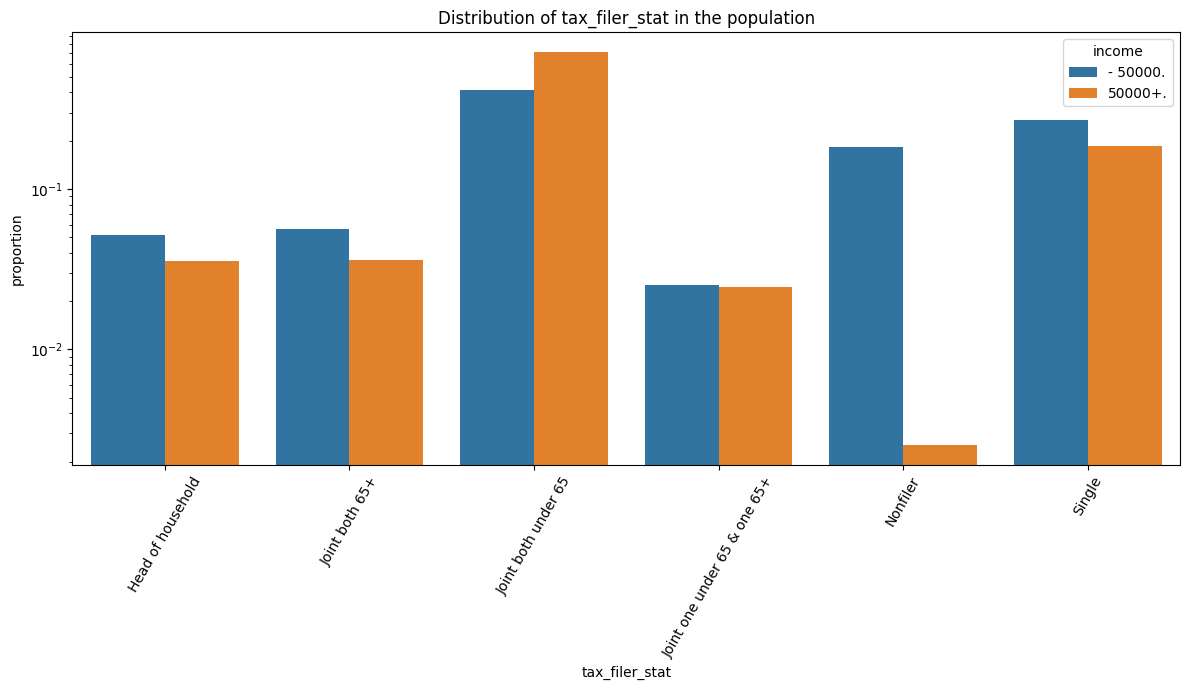

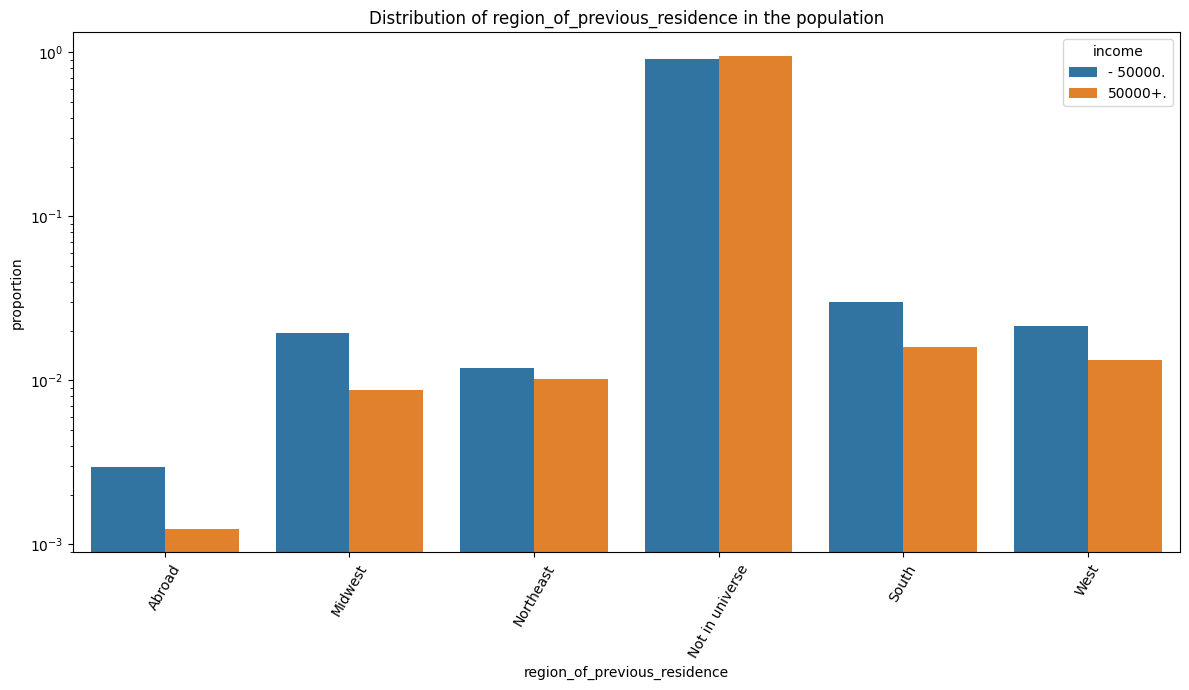

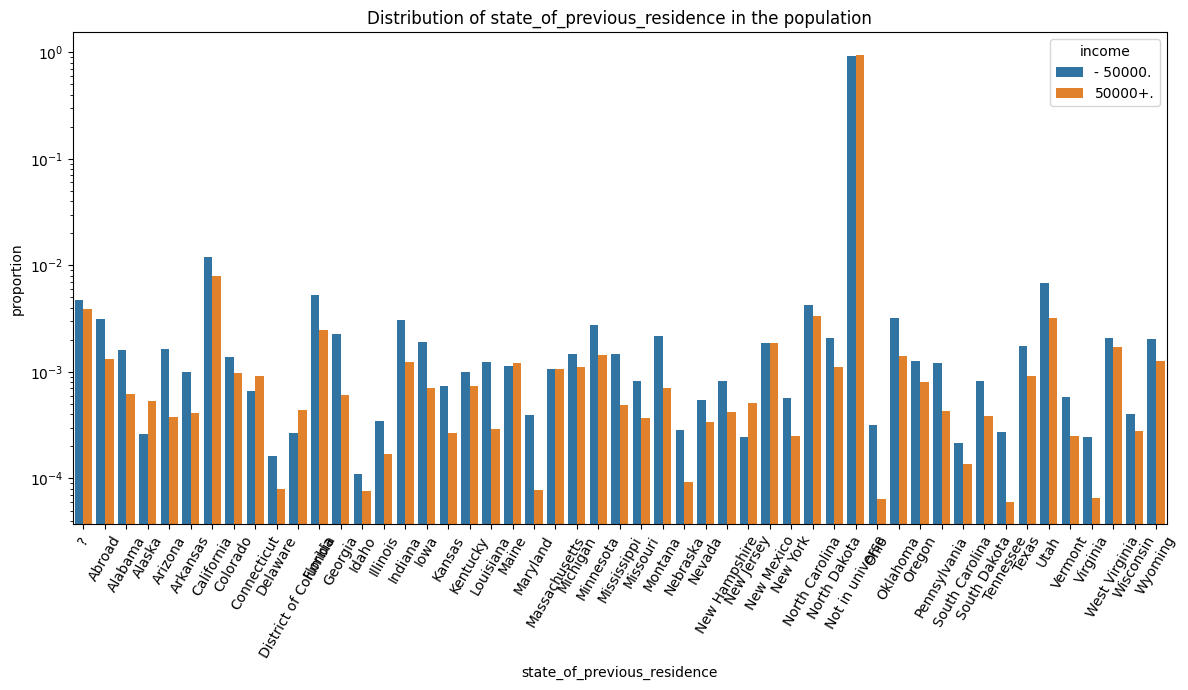

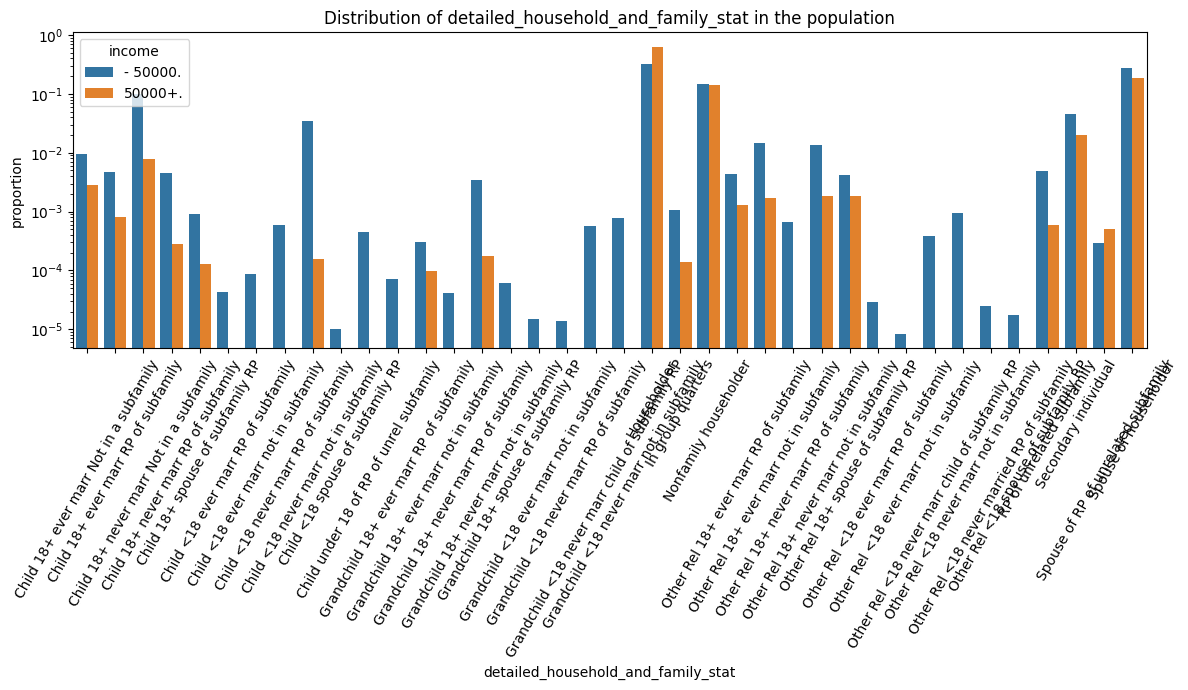

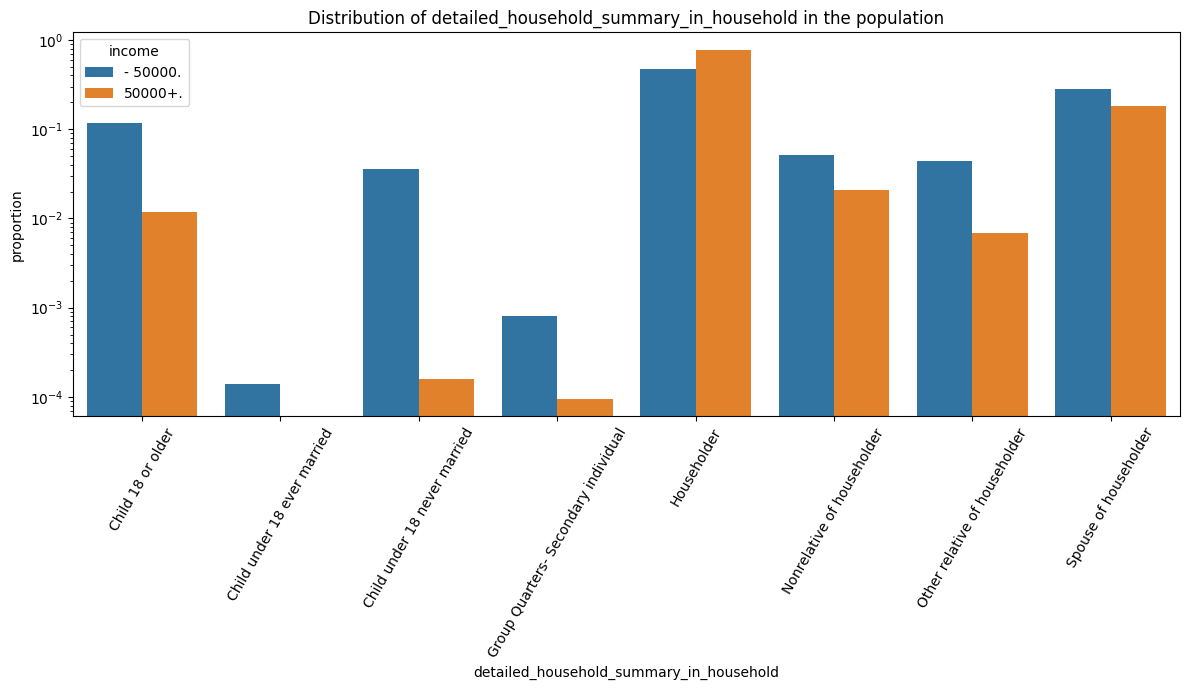

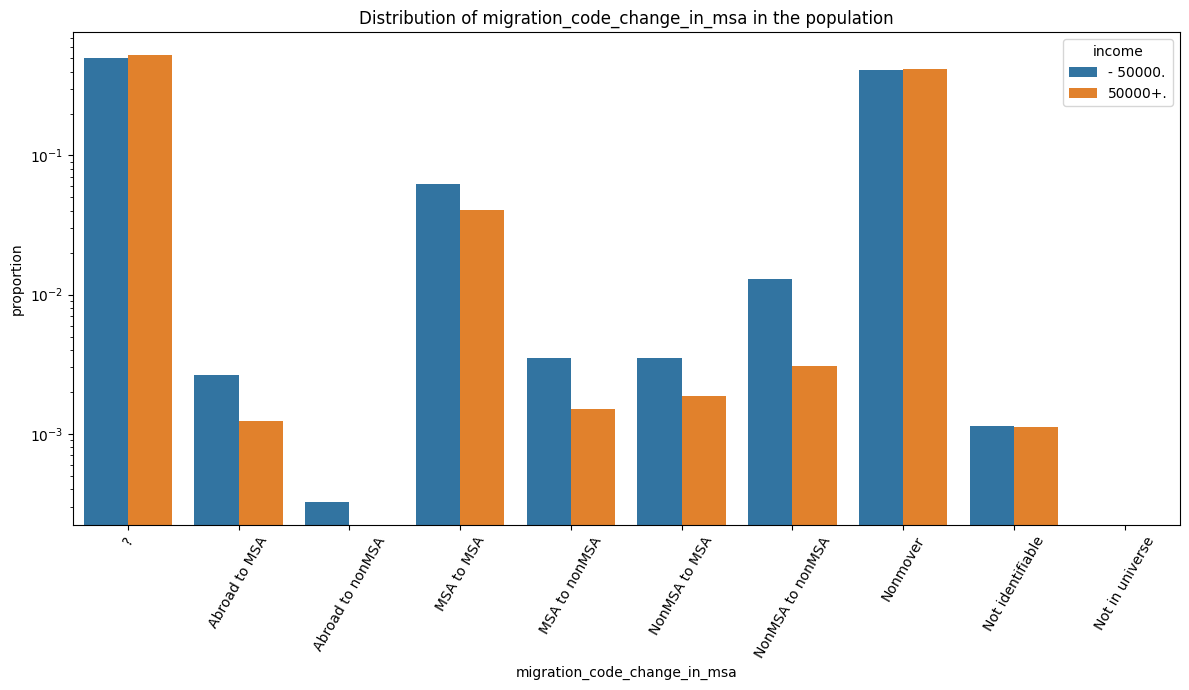

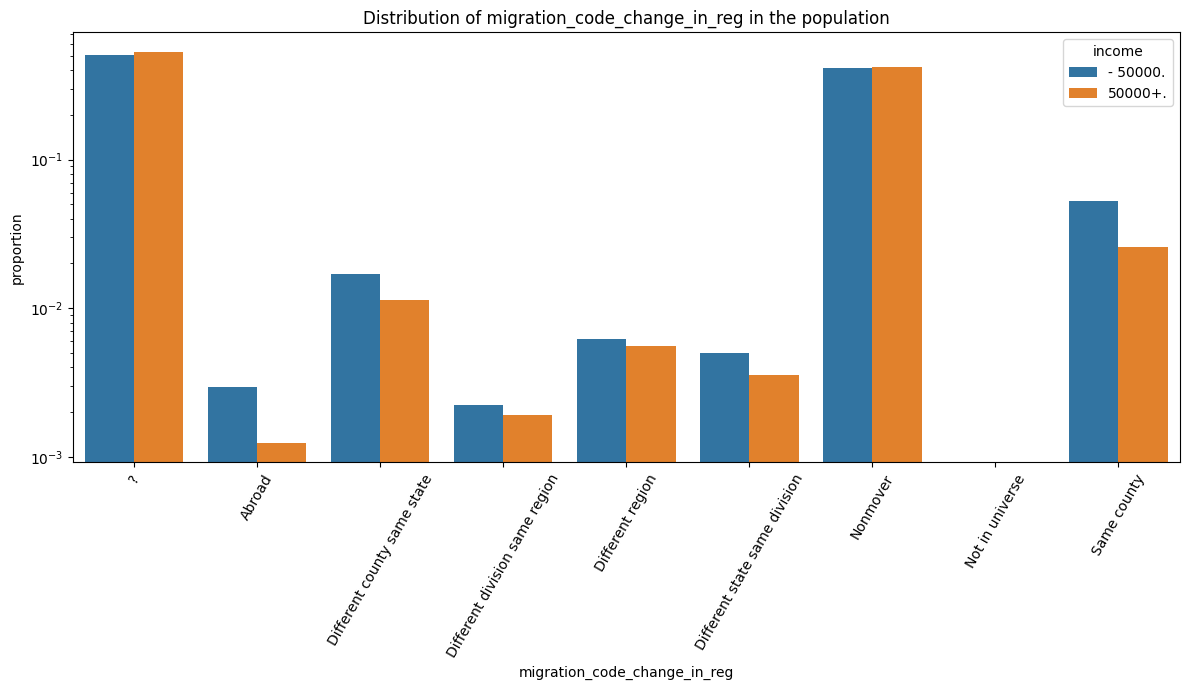

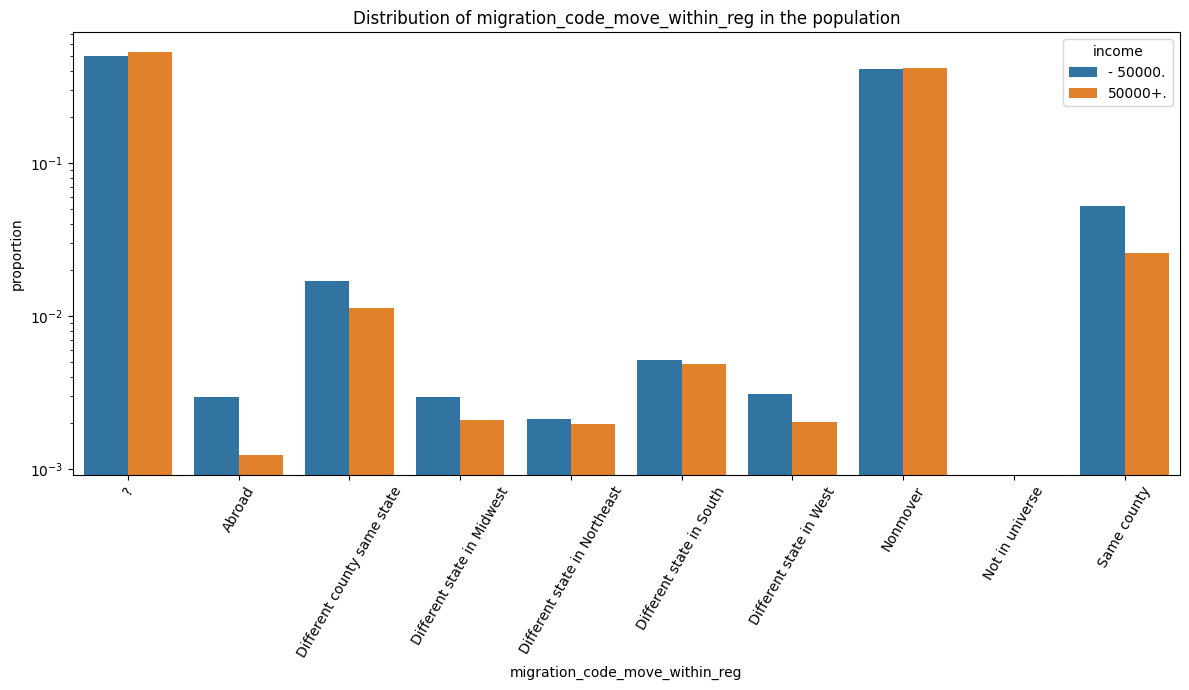

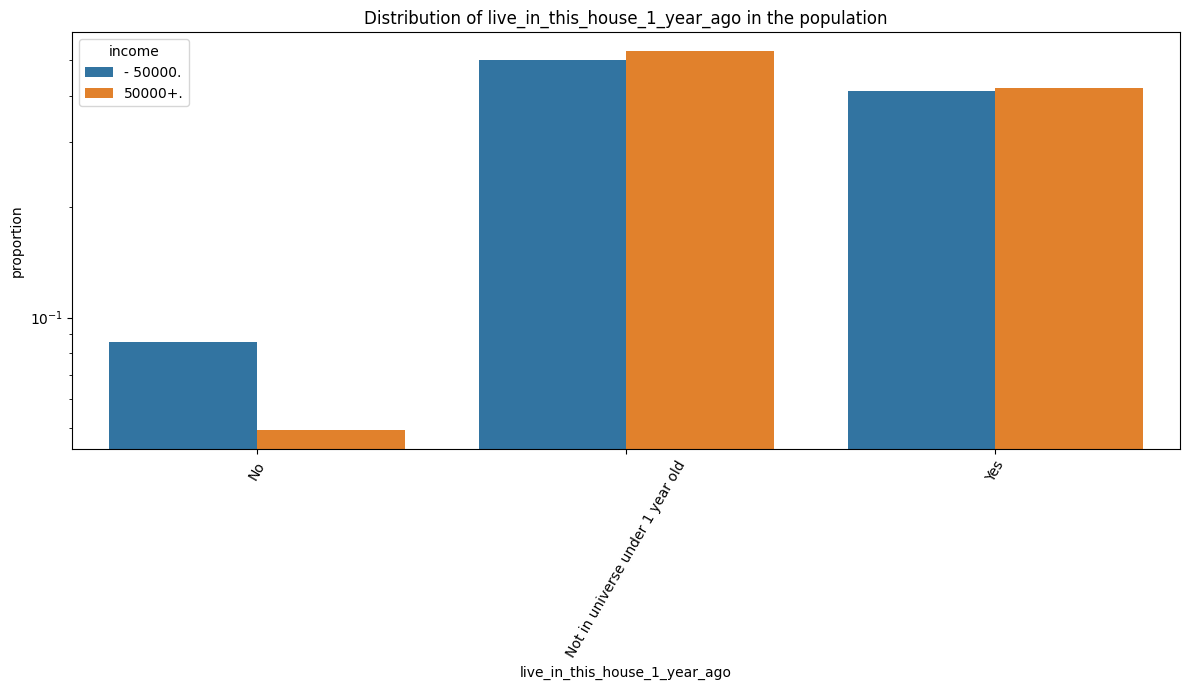

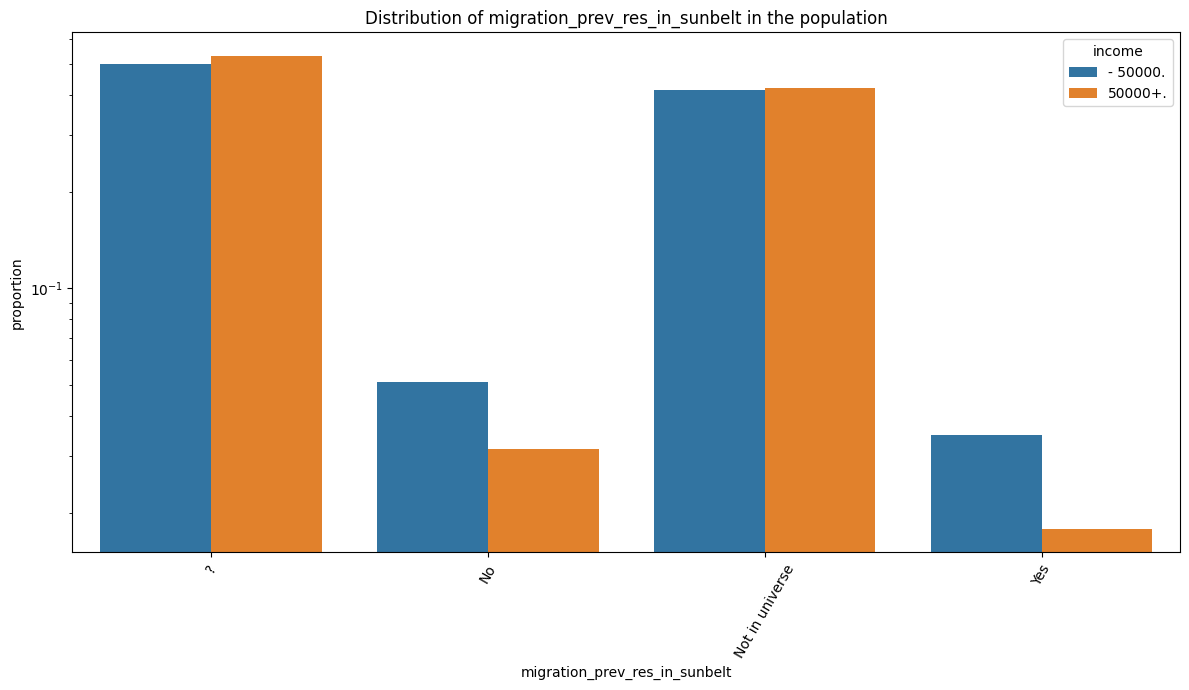

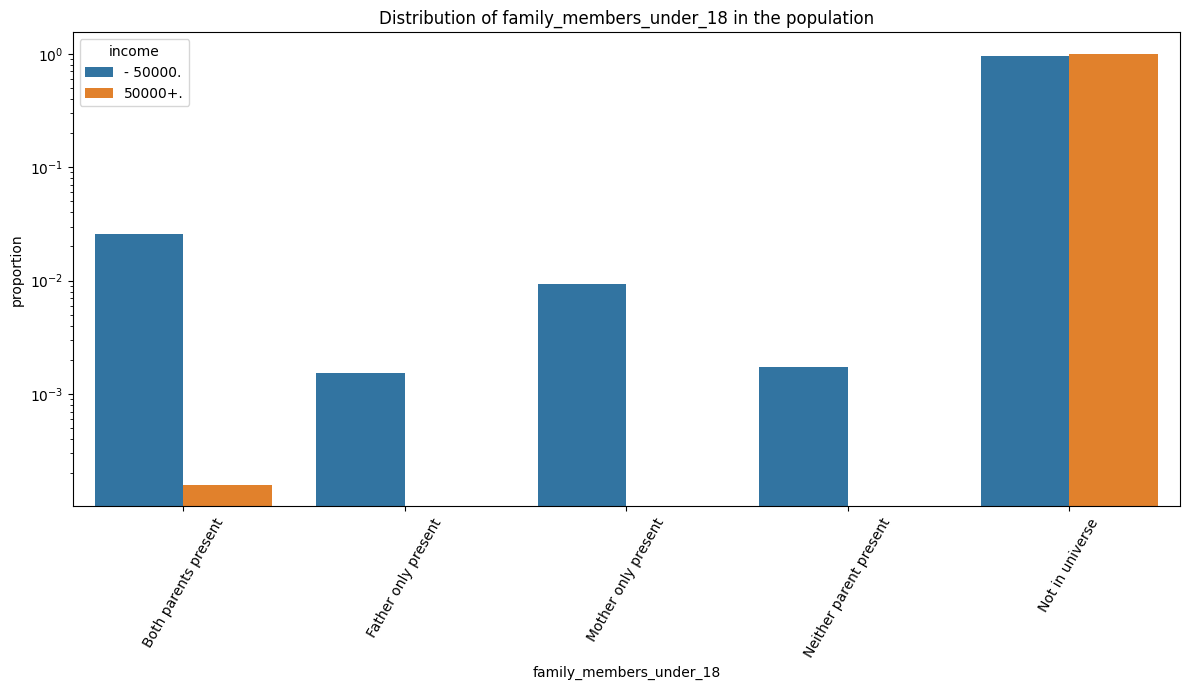

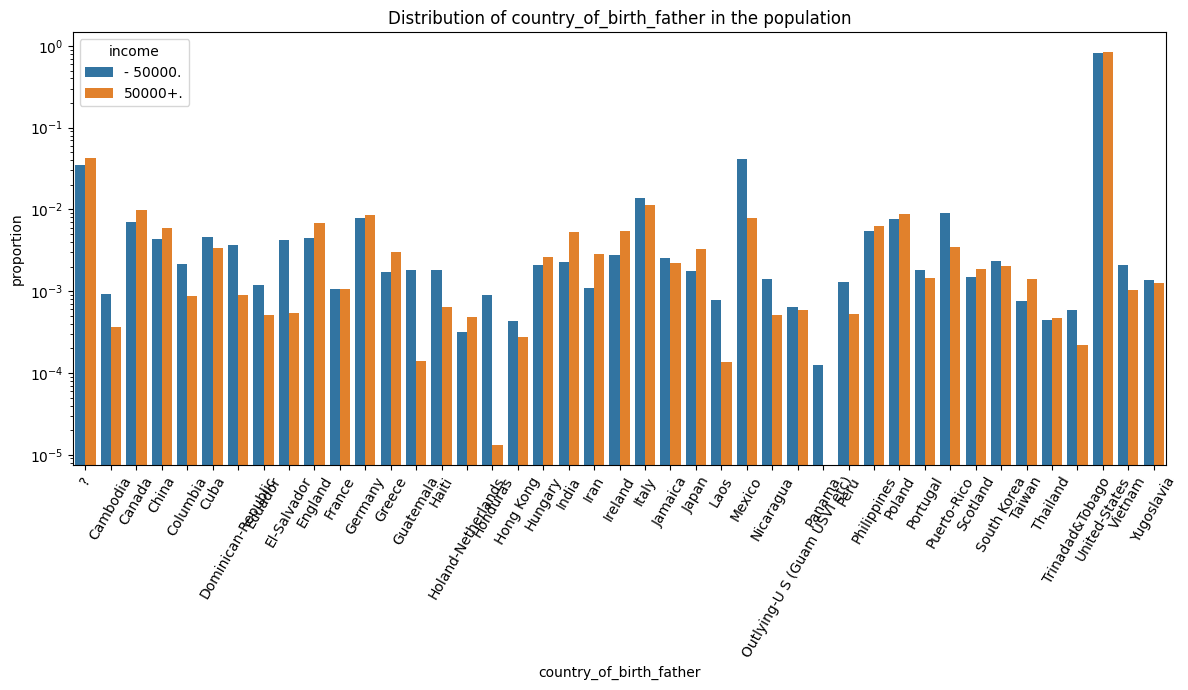

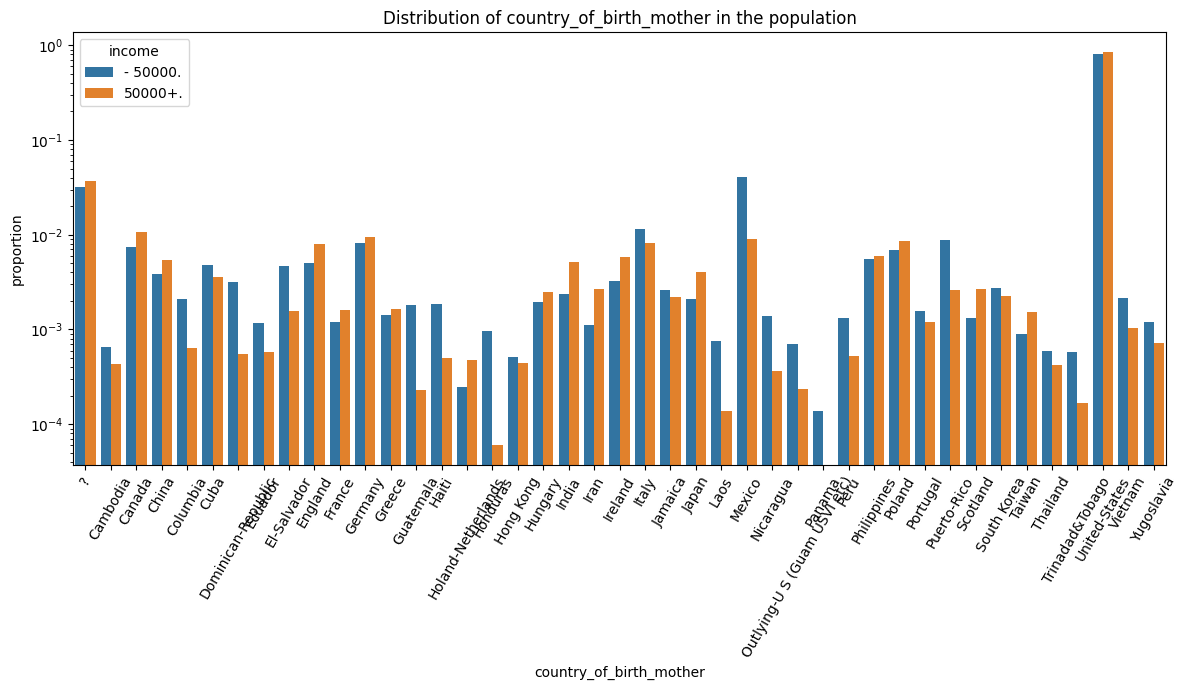

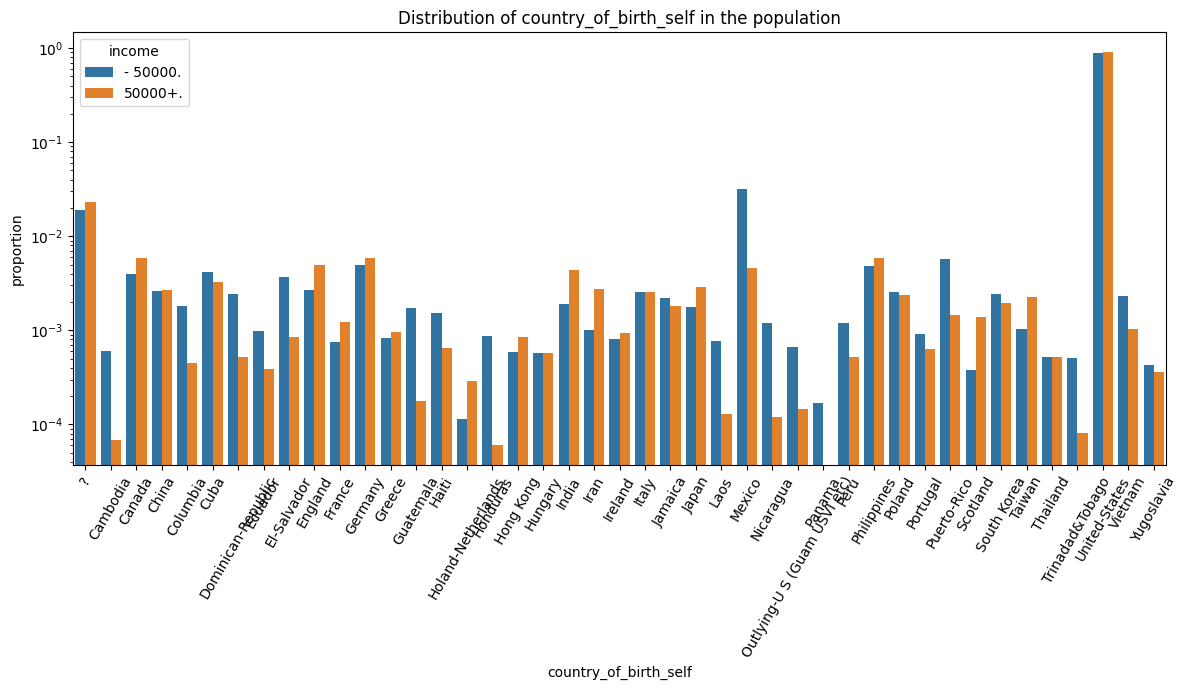

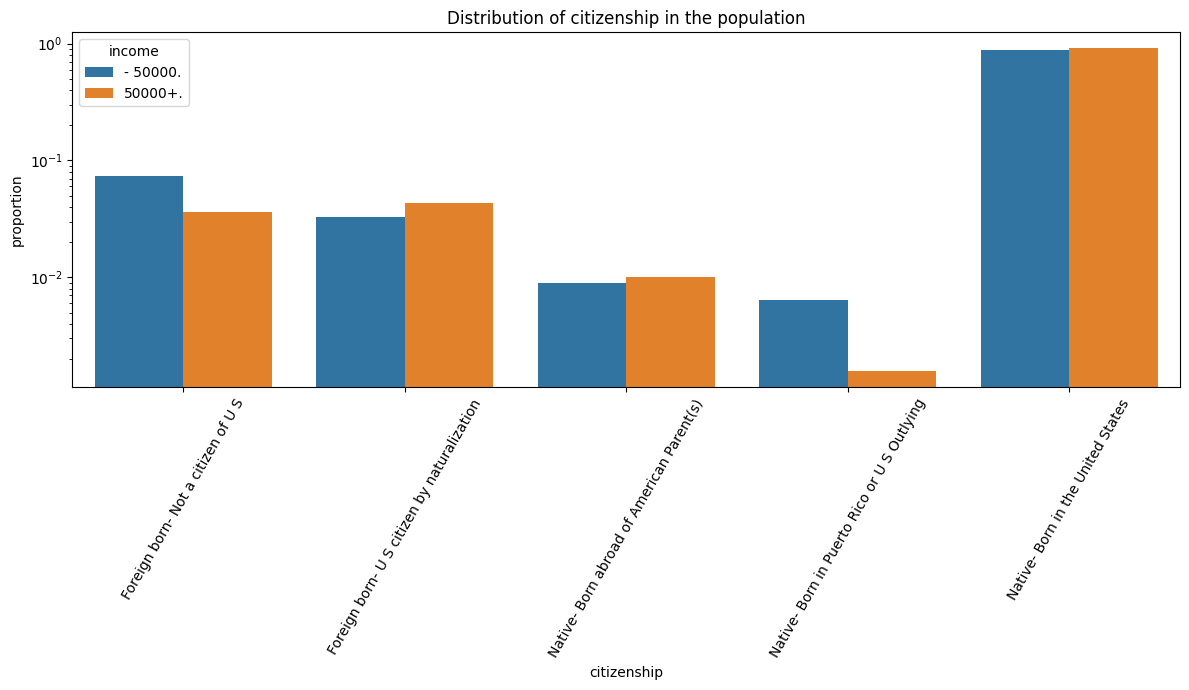

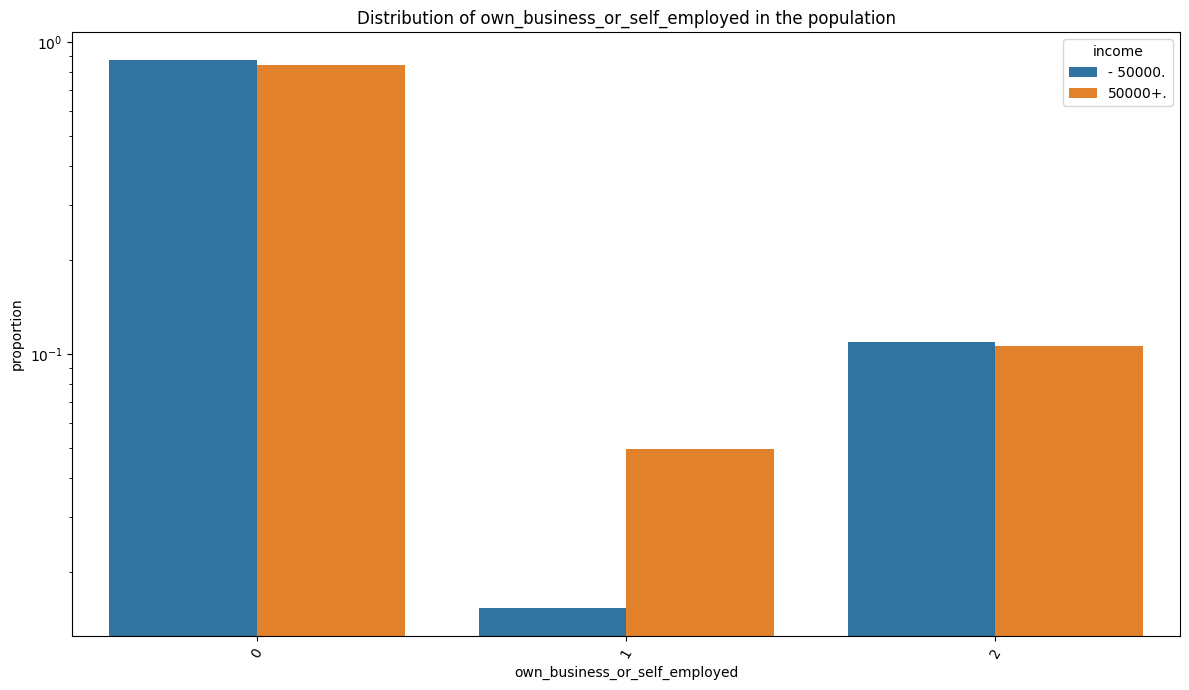

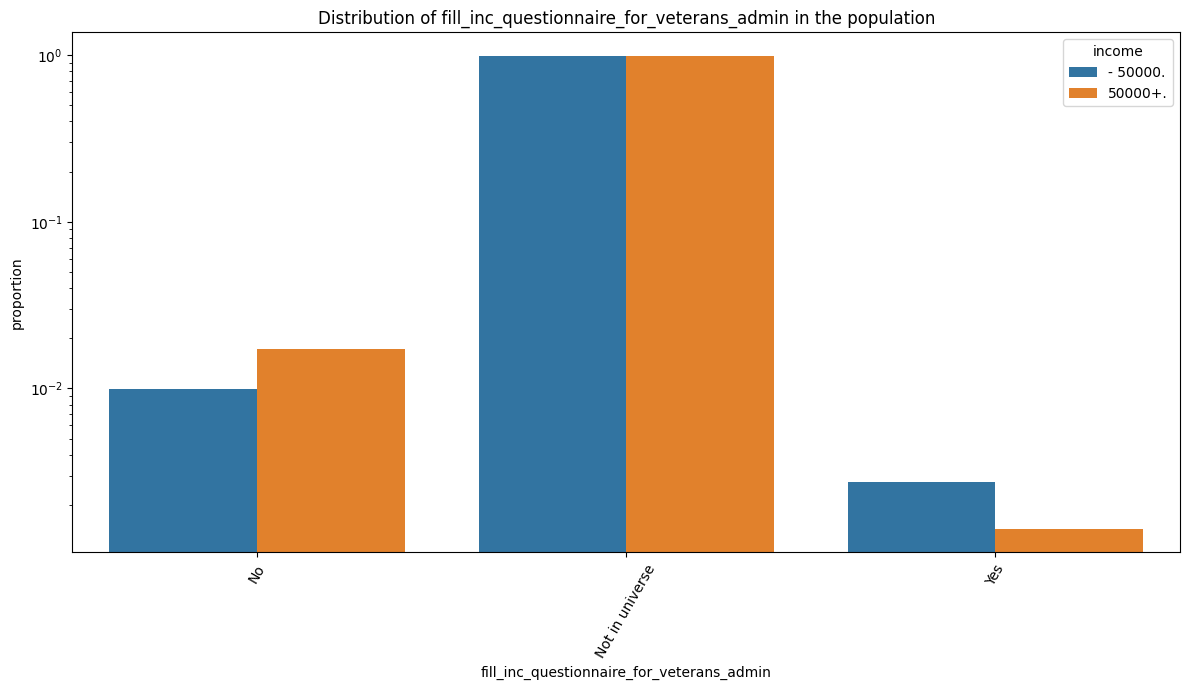

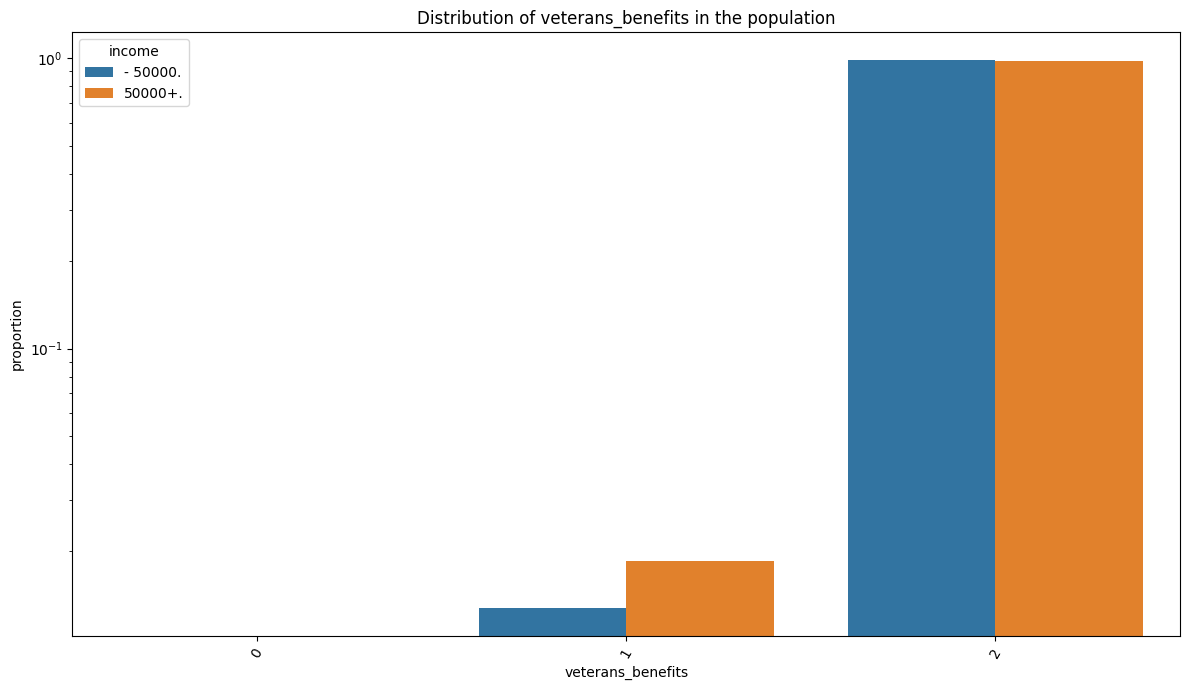

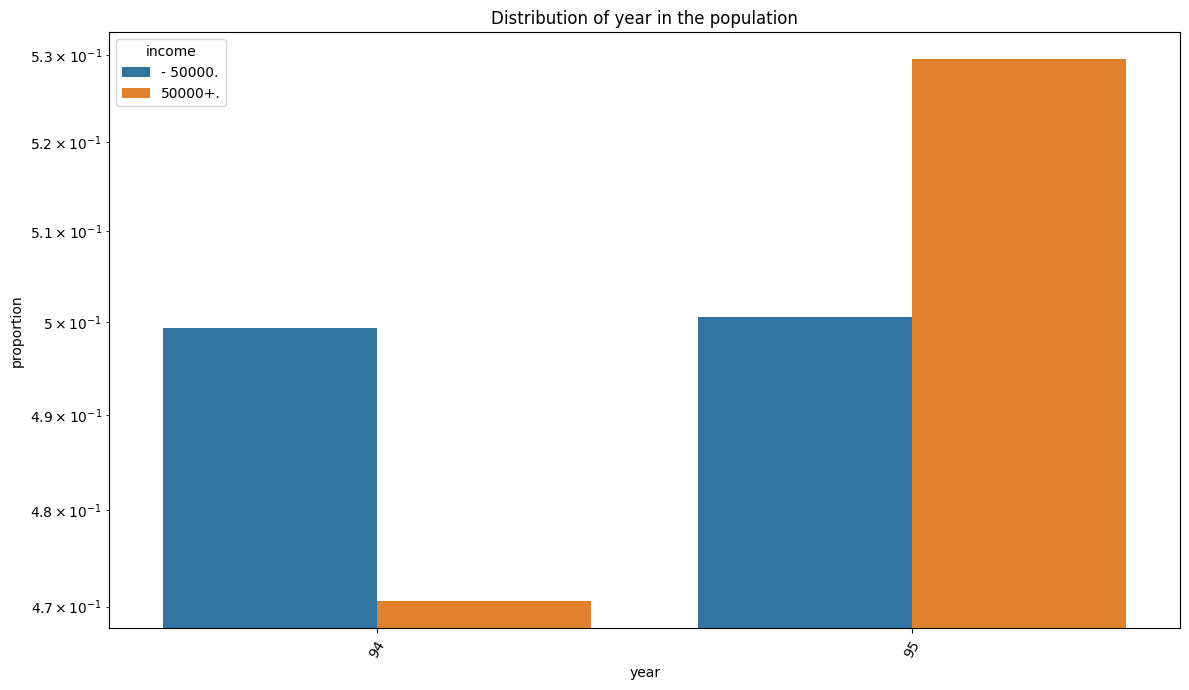

In [23]:
data_pipeline = DataPipe(data_config=data_config)
data_pipeline.run()